waste.ipynb

Author: UFO Software, LLC
Created: Wednesday, February 14, 2021 13:02

License GPLv3+: GNU GPL version 3 or later https://gnu.org/licenses/gpl.html 
This is free software: you are free to change and redistribute it.
There is NO WARRANTY, to the extent permitted by law.

Reads in the Batches_0.csv file from the December 2020 WA State Traceability Data and displays cannabis waste per producer per day by plant stage.

In [80]:
import pandas as pd
import numpy as np
from pathlib import Path
import os

import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# replace with your path to the data
file_path = Path('../dec-2020')
pd.set_option('display.max_columns', None)
pd.options.display.float_format = "{:.2f}".format

In [81]:
def get_batches_df():
    
    # define column dtypes to reduce memory footprint
    col_dtypes = {'global_id': 'string',
                 'mme_id': 'string',
                 'user_id': 'string',
                 'external_id': 'string',
                 'uom': 'category',
                 #'planted_at': 'string', depreciated
                 #'created_by_mme_id', 'string', Every entry is nan
                 'num_plants': 'int32',
                 'status': 'category',
                 'strain_id': 'string',
                 'is_parent_batch': 'bool',
                 'is_child_batch': 'bool',
                 'type': 'category',
                 'harvest_stage': 'category',
                 #'qty_accumulated_waste': 'float32', depreciated
                 'qty_packaged_flower': 'float32',
                 'qty_packaged_by_product': 'float32',
                 'area_id': 'string',
                 'origin': 'category',
                 #'qty_cure': 'float32' depreciated
                 'plant_stage': 'category',
                 'flower_dry_weight': 'float32',
                 'waste': 'float32',
                 'other_dry_weight': 'float32',
                 'flower_wet_weight': 'float32',
                 'other_wet_weight': 'float32'}

    # parse date columns
    date_cols = ['created_at',
                 'updated_at',
                 #'planted_at', depreciated
                 'harvested_at',
                 'batch_created_at',
                 'packaged_completed_at',
                 'deleted_at',
                 'harvested_end_at']
    
    # define columns to load to reduce memory footprint by only loading the columns needed
    cols = list(col_dtypes.keys()) + date_cols

    batches_df = pd.read_csv(file_path / 'Batches_0.csv', sep = '\t', encoding = 'utf-16', usecols = cols, dtype = col_dtypes, parse_dates = date_cols)
    
    return batches_df

In [82]:
# read the data into a dataframe
batches_df = get_batches_df()
batches_df.head()

,global_id,created_at,updated_at,mme_id,user_id,external_id,uom,harvested_at,batch_created_at,num_plants,status,strain_id,is_parent_batch,is_child_batch,type,harvest_stage,qty_packaged_flower,qty_packaged_by_product,packaged_completed_at,area_id,origin,plant_stage,deleted_at,flower_dry_weight,waste,other_dry_weight,harvested_end_at,flower_wet_weight,other_wet_weight
0,WAJ412598.BA1,2018-01-31 17:24:31,2018-01-31 17:24:32,WAWA1.MMDJ,WAWA1.USAM,4125980000004911,ea,1900-01-01,2018-01-31 17:24:31,0,open,WAJ412598.STX,False,False,propagation material,NaN,0.00,0.00,1900-01-01,WAJ412598.AR3,clone,seedling,NaT,0.00,0.00,0.00,NaT,0.00,0.00
1,WAJ412598.BA2,2018-01-31 17:24:32,2018-01-31 17:24:32,WAWA1.MMDJ,WAWA1.USAM,4125980000004921,ea,1900-01-01,2018-01-31 17:24:32,0,open,WAJ412598.STX,False,False,propagation material,NaN,0.00,0.00,1900-01-01,WAJ412598.AR3,clone,seedling,NaT,0.00,0.00,0.00,NaT,0.00,0.00
2,WAJ412598.BA3,2018-01-31 17:24:30,2018-01-31 17:24:30,WAWA1.MMDJ,WAWA1.USAM,4125980000005382,ea,1900-01-01,2018-01-31 17:24:30,0,open,WAJ412598.STX,False,False,propagation material,NaN,0.00,0.00,1900-01-01,WAJ412598.AR3,clone,seedling,NaT,0.00,0.00,0.00,NaT,0.00,0.00
3,WAJ412598.BA4,2018-01-31 17:24:35,2018-01-31 17:24:35,WAWA1.MMDJ,WAWA1.USAM,4125980000005399,ea,1900-01-01,2018-01-31 17:24:35,0,open,WAJ412598.STX,False,False,propagation material,NaN,0.00,0.00,1900-01-01,WAJ412598.AR3,clone,seedling,NaT,0.00,0.00,0.00,NaT,0.00,0.00
4,WAJ412598.BA5,2018-01-31 17:24:32,2018-01-31 17:24:32,WAWA1.MMDJ,WAWA1.USAM,4125980000005409,ea,1900-01-01,2018-01-31 17:24:32,0,open,WAJ412598.STX,False,False,propagation material,NaN,0.00,0.00,1900-01-01,WAJ412598.AR3,clone,seedling,NaT,0.00,0.00,0.00,NaT,0.00,0.00


In [83]:
batches_df.tail()

,global_id,created_at,updated_at,mme_id,user_id,external_id,uom,harvested_at,batch_created_at,num_plants,status,strain_id,is_parent_batch,is_child_batch,type,harvest_stage,qty_packaged_flower,qty_packaged_by_product,packaged_completed_at,area_id,origin,plant_stage,deleted_at,flower_dry_weight,waste,other_dry_weight,harvested_end_at,flower_wet_weight,other_wet_weight
37646467,WAJ416113.BAMF89H,2021-01-06 05:38:56,2021-01-06 05:38:58,WAWA1.MM1F4,WAWA1.US205,<NA>,ea,1900-01-01,2021-01-06 05:38:56,1,open,WAJ416113.STO1DS,True,False,plant,NaN,0.00,0.00,1900-01-01 00:00:00,WAJ416113.AR5XU7,plant,growing,NaT,0.00,0.00,0.00,NaT,0.00,0.00
37646468,WAJ416113.BAMF89I,2021-01-06 05:38:57,2021-01-06 05:38:59,WAWA1.MM1F4,WAWA1.US205,<NA>,ea,1900-01-01,2021-01-06 05:38:57,1,open,WAJ416113.ST1L6,True,False,plant,NaN,0.00,0.00,1900-01-01 00:00:00,WAJ416113.AR5XU7,plant,growing,NaT,0.00,0.00,0.00,NaT,0.00,0.00
37646469,WAJ412130.BAMF89J,2021-01-06 05:38:57,2021-01-06 05:38:57,WAWA1.MMHO,WAWA1.USF0,4121300000011549,ea,1900-01-01,2021-01-06 05:38:57,0,open,WAJ412130.STIHA7,False,False,intermediate/ end product,NaN,0.00,0.00,2021-01-05 16:00:00,WAJ412130.AR4C5K,NaN,seedling,NaT,0.00,0.00,0.00,NaT,0.00,0.00
37646470,WAJ417150.BAMF89K,2021-01-06 05:38:57,2021-01-06 05:38:57,WAWA1.MMXN,WAWA1.US2B5,IN_CONV2_WAJ417150.INSOT2R,gm,1900-01-01,2021-01-06 05:38:57,0,open,WAJ417150.STNP01,False,True,intermediate/ end product,NaN,0.00,0.00,2021-01-05 16:00:00,WAJ417150.AR2456,NaN,seedling,NaT,0.00,0.00,0.00,NaT,0.00,0.00
37646471,WAJ412130.BAMF89L,2021-01-06 05:38:58,2021-01-06 05:38:58,WAWA1.MMHO,WAWA1.USF0,4121300000011550,ea,1900-01-01,2021-01-06 05:38:58,0,open,WAJ412130.STIHA7,False,False,intermediate/ end product,NaN,0.00,0.00,2021-01-05 16:00:00,WAJ412130.AR4C5K,NaN,seedling,NaT,0.00,0.00,0.00,NaT,0.00,0.00


Overview of the data to see if anything stands out.
Every numeric column has negative values so those also need to be addressed.

In [84]:
batches_df.describe()

,num_plants,qty_packaged_flower,qty_packaged_by_product,flower_dry_weight,waste,other_dry_weight,flower_wet_weight,other_wet_weight
count,37646472.00,37646472.00,37646472.00,37646472.00,37646472.00,37646472.00,37646472.00,37646472.00
mean,2.51,425.49,344.69,207.82,192.69,51.53,2256.29,160.78
std,288.98,145084.23,6095.85,17112.99,10032.24,2002.18,74060.10,29858.75
min,-1169767.00,-654602432.00,-155.50,-1.00,-1130.00,-26049.70,-1.00,-1.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,200200.00,23885058.00,4000000.00,90084336.00,25438788.00,1176496.00,248132496.00,40433060.00


In [85]:
batches_df.type.unique()

['propagation material', 'plant', 'intermediate/ end product', 'harvest', NaN, 'waste']
Categories (5, object): ['propagation material', 'plant', 'intermediate/ end product', 'harvest', 'waste']

In [86]:
#There are no Nan entries in the waste column
batches_df.waste.isna().unique()

array([False])

In [87]:
# find all the entries where the waste value is less than zero
batches_df[batches_df.waste < 0]

,global_id,created_at,updated_at,mme_id,user_id,external_id,uom,harvested_at,batch_created_at,num_plants,status,strain_id,is_parent_batch,is_child_batch,type,harvest_stage,qty_packaged_flower,qty_packaged_by_product,packaged_completed_at,area_id,origin,plant_stage,deleted_at,flower_dry_weight,waste,other_dry_weight,harvested_end_at,flower_wet_weight,other_wet_weight
117141,WAJ412146.BA2IDY,2018-02-01 13:53:57,2019-06-04 07:32:29,WAWA1.MM7Q,WAWA1.USZR,<NA>,ea,2017-10-07 10:20:00,1900-01-01 00:00:00,0,closed,WAJ412146.STMJ4,False,False,harvest,finished,0.00,0.00,1900-01-01,WAJ412146.AR697,plant,harvested,NaT,0.00,-1130.00,7950.00,2017-10-07 10:20:00,14720.00,0.00
8286602,WAJ416958.BA4XONH,2018-03-28 15:00:00,2018-03-28 15:00:00,WAWA1.MMOM,WAWA1.US1S3,<NA>,gm,2017-11-22 16:00:00,2018-03-28 15:00:00,0,open,WAJ416958.ST64SL,False,False,harvest,finished,0.00,0.00,1900-01-01,WAJ416958.AR1M5L,seed,seedling,NaT,2267.00,-1.00,0.00,2017-11-23 13:59:00,0.00,0.00
8756360,WAJ412815.BA57RJH,2018-04-13 05:09:45,2018-04-13 05:09:45,WAWA1.MMAH,WAWA1.US7I,<NA>,gm,2017-11-22 16:00:00,2018-03-28 15:00:00,0,open,WAJ412815.ST42P7,False,False,harvest,finished,0.00,0.00,1900-01-01,WAJ412815.AR10FM,seed,seedling,NaT,2267.00,-1.00,0.00,2017-11-23 13:59:00,0.00,0.00
8858990,WAL7.BA59YSX,2018-04-17 09:37:52,2018-04-17 09:37:52,WAWA1.MM1L8,WAWA1.US386,<NA>,gm,2017-11-22 16:00:00,2018-03-28 15:00:00,0,open,<NA>,False,False,harvest,finished,0.00,0.00,1900-01-01,WAL7.AR1FLY,seed,seedling,NaT,2267.00,-1.00,0.00,2017-11-23 13:59:00,0.00,0.00
9606937,WAJ416502.BA5Q03W,2018-05-17 03:03:03,2018-05-21 06:57:06,WAWA1.MMIX,WAWA1.USGG,<NA>,gm,2017-11-22 16:00:00,2018-03-28 15:00:00,0,open,WAJ416502.ST574,True,False,harvest,finished,0.00,0.00,1900-01-01,WAJ416502.AR1MNW,seed,seedling,NaT,2267.00,-1.00,0.00,2017-11-23 13:59:00,0.00,0.00


In [88]:
# change these to a postitive value by multiplying by -1
batches_df.loc[(batches_df.waste < 0), 'waste'] = batches_df.loc[(batches_df.waste < 0), 'waste'] * -1.0

In [89]:
batches_df[batches_df.waste < 0]

,global_id,created_at,updated_at,mme_id,user_id,external_id,uom,harvested_at,batch_created_at,num_plants,status,strain_id,is_parent_batch,is_child_batch,type,harvest_stage,qty_packaged_flower,qty_packaged_by_product,packaged_completed_at,area_id,origin,plant_stage,deleted_at,flower_dry_weight,waste,other_dry_weight,harvested_end_at,flower_wet_weight,other_wet_weight


In [90]:
# What are the plant stages?
batches_df.plant_stage.unique()

['seedling', NaN, 'growing', 'flower', 'harvested', 'clone', 'transferred', 'packaged', 'destroyed']
Categories (8, object): ['seedling', 'growing', 'flower', 'harvested', 'clone', 'transferred', 'packaged', 'destroyed']

In [91]:
# fill in missing values where waste is present but the plant stage is missing using the most common value
batches_df.loc[(batches_df.plant_stage.isna() & batches_df.waste > 0), 'plant_stage'] = 'harvested'

The values for waste are larege so converting them froms grams to kilograms should make the data easier to read

In [92]:
batches_df['waste_kg'] = batches_df.waste / 1000

# Harvested Waste

Find the amount of waste for harvested product

In [93]:
wasted_harvested_df =  batches_df[(batches_df.plant_stage == 'harvested') & (batches_df.waste > 0)].copy()
wasted_harvested_df

,global_id,created_at,updated_at,mme_id,user_id,external_id,uom,harvested_at,batch_created_at,num_plants,status,strain_id,is_parent_batch,is_child_batch,type,harvest_stage,qty_packaged_flower,qty_packaged_by_product,packaged_completed_at,area_id,origin,plant_stage,deleted_at,flower_dry_weight,waste,other_dry_weight,harvested_end_at,flower_wet_weight,other_wet_weight,waste_kg
54149,WAJ415941.BA15S6,2018-02-01 03:21:07,2018-02-15 05:16:59,WAWA1.MM1DF,WAWA1.US1KY,<NA>,ea,2018-01-12 03:07:00,1900-01-01 00:00:00,0,open,WAJ415941.ST6IU,False,False,harvest,cure,0.00,0.00,1900-01-01,WAJ415941.AR21E,plant,harvested,NaT,3365.00,280.00,950.00,2018-01-12 03:07:00,25025.08,0.00,0.28
54153,WAJ415941.BA15SA,2018-02-01 03:21:09,2018-02-15 05:58:28,WAWA1.MM1DF,WAWA1.US1KY,<NA>,ea,2018-01-28 05:49:00,1900-01-01 00:00:00,0,open,WAJ415941.ST6I7,False,False,harvest,cure,0.00,0.00,1900-01-01,WAJ415941.AR21E,plant,harvested,NaT,5694.00,5389.00,5392.00,2018-01-28 05:49:00,42000.17,0.00,5.39
55716,WAJ413090.BA16ZP,2018-02-01 03:37:02,2019-03-06 14:10:11,WAWA1.MMQP,WAWA1.USQN,<NA>,ea,2017-03-09 09:24:00,1900-01-01 00:00:00,0,open,WAJ413090.ST77P,False,False,harvest,cure,0.00,0.00,1900-01-01,WAJ413090.AR2AS,plant,harvested,NaT,98.00,248.33,168.75,2017-03-09 09:24:00,461.67,0.00,0.25
55763,WAJ413090.BA1710,2018-02-01 03:37:31,2018-02-01 09:49:40,WAWA1.MMQP,WAWA1.USQN,<NA>,ea,2018-01-15 05:55:00,1900-01-01 00:00:00,0,open,WAJ413090.ST76K,False,False,harvest,cure,0.00,0.00,1900-01-01,WAJ413090.AR2GT,plant,harvested,NaT,653.53,1560.00,737.26,2018-01-15 05:55:00,10415.16,0.00,1.56
59253,WAG413150.BA19PY,2018-02-01 04:25:09,2018-03-29 14:08:05,WAWA1.MM9V,WAWA1.US7F,<NA>,ea,2018-01-09 08:14:00,1900-01-01 00:00:00,0,closed,WAG413150.ST8S4,False,False,harvest,cure,0.00,0.00,1900-01-01,WAG413150.AR2YL,plant,harvested,NaT,1551.00,4073.00,472.00,2018-01-09 08:14:00,7247.10,0.00,4.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37639642,WAJ412435.BAMF2ZW,2021-01-06 04:04:44,2021-01-06 06:01:37,WAWA1.MMH2,WAWA1.USBD7,340,gm,2020-11-30 10:01:00,2021-01-06 04:04:44,26,closed,WAJ412435.STP3H6,True,True,harvest,finished,2065.00,865.00,1900-01-01,WAJ412435.AR2E5P,clone,harvested,NaT,0.00,850.00,0.00,NaT,17898.72,5311.28,0.85
37639704,WAJ412435.BAMF31M,2021-01-06 04:06:25,2021-01-06 06:00:09,WAWA1.MMH2,WAWA1.USBD7,341,gm,2020-11-30 10:04:00,2021-01-06 04:06:25,16,closed,WAJ412435.ST6U68,True,True,harvest,finished,1615.00,565.00,1900-01-01,WAJ412435.AR2E5P,clone,harvested,NaT,0.00,240.00,0.00,NaT,11735.56,3574.44,0.24
37639883,WAJ412435.BAMF36L,2021-01-06 04:12:14,2021-01-06 05:58:47,WAWA1.MMH2,WAWA1.USBD7,333,gm,2020-11-16 10:22:00,2021-01-06 04:12:14,23,closed,WAJ412435.STOJBJ,True,True,harvest,finished,2865.00,435.00,1900-01-01,WAJ412435.AR2E5P,clone,harvested,NaT,0.00,950.00,0.00,NaT,21884.64,2495.36,0.95
37641611,WAJ416113.BAMF4IL,2021-01-06 04:36:56,2021-01-06 04:39:06,WAWA1.MM1F4,WAWA1.US205,4557,gm,2021-01-06 12:35:00,2021-01-06 04:36:56,152,closed,WAJ416113.STO1DS,True,True,harvest,finished,18775.00,15220.00,1900-01-01,WAJ416113.ARIY,clone,harvested,NaT,0.00,9485.00,0.00,NaT,28260.00,15220.00,9.48


In [94]:
wasted_harvested_df.describe()

,num_plants,qty_packaged_flower,qty_packaged_by_product,flower_dry_weight,waste,other_dry_weight,flower_wet_weight,other_wet_weight,waste_kg
count,763287.00,763287.00,763287.00,763287.00,763287.00,763287.00,763287.00,763287.00,763287.00
mean,5.80,102.08,42.44,470.06,1103.88,50.35,6440.86,938.36,1.10
std,49.88,2891.36,1476.36,10005.96,12837.98,1141.97,98581.05,32829.92,12.84
min,0.00,-278951.69,0.00,0.00,0.01,-1.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,8.61,0.00,168.59,0.00,0.01
50%,0.00,0.00,0.00,0.00,36.40,0.00,273.75,0.00,0.04
75%,0.00,0.00,0.00,0.00,176.87,0.00,661.98,0.00,0.18
max,10000.00,1028220.00,435448.97,1012452.00,1031922.00,161711.00,15358748.00,2826544.00,1031.92


Using the harvested at date for the independent variable reveals some annomalies.<br>
The data was generated from 2018 to 2021

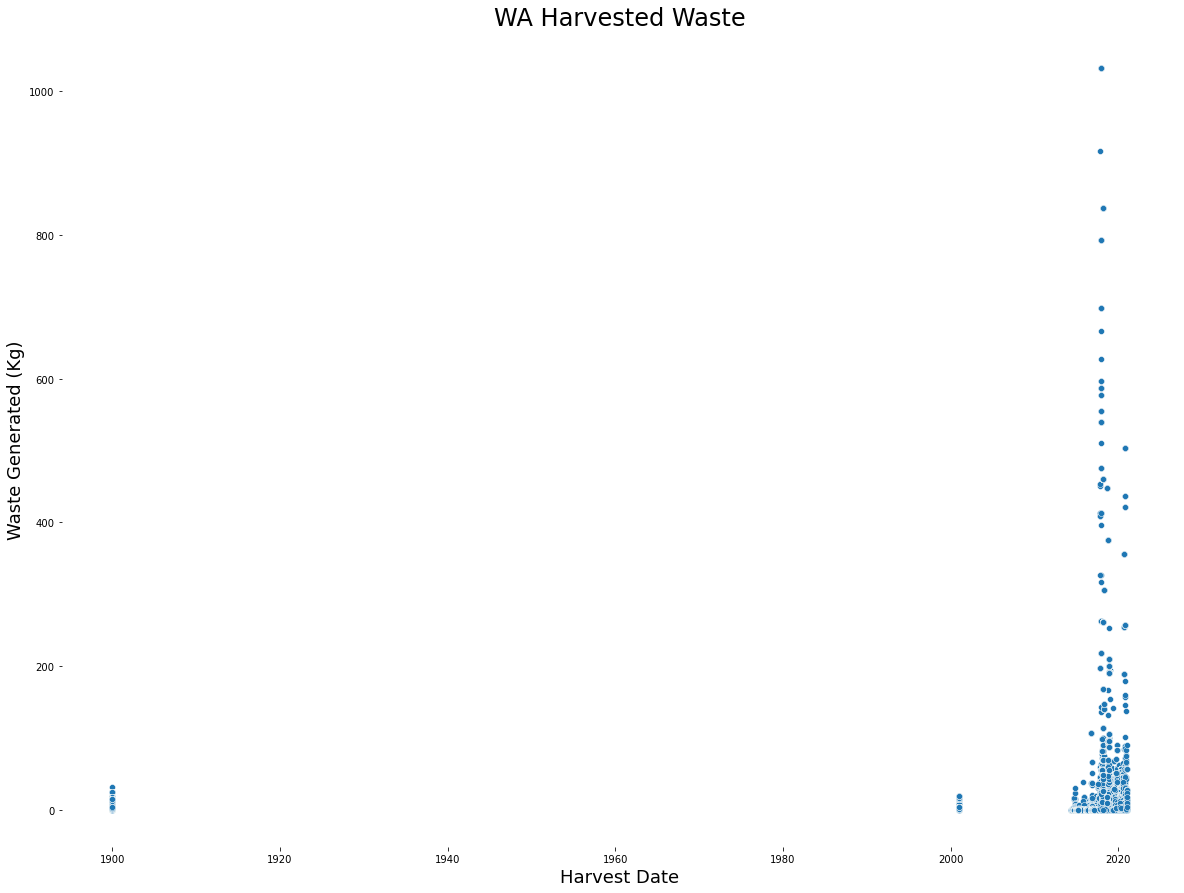

In [95]:
fig, scatter = plt.subplots(figsize = (20,15))
scatter = sns.scatterplot(data = wasted_harvested_df, x = 'harvested_at', y = "waste_kg");
scatter.set_xlabel('Harvest Date', fontsize = 18);
scatter.set_ylabel('Waste Generated (Kg)', fontsize = 18);
scatter.set_title("WA Harvested Waste", fontsize = 24);
sns.despine(left=True, right=True, top=True, bottom=True)

Find the number of rows where the harvested at date is before 2018

In [96]:
bad_harvest_date_len = len(wasted_harvested_df[(wasted_harvested_df.waste > 0) & (wasted_harvested_df.harvested_at.dt.year < 2018)].index)
bad_harvest_date_len

669024

88% of records have a bad harvested at date before 2018 so we need to find an alternative date to use

In [97]:
(bad_harvest_date_len / len(wasted_harvested_df.index))*100

87.65038576577355

The updated at date is the last time the recorded was updated.  The problem with using the updated at date is that the data may not updated in real time and the date may not reflect the day the waste was generated.

In [98]:
wasted_harvested_df['update_date'] = wasted_harvested_df.updated_at.dt.date

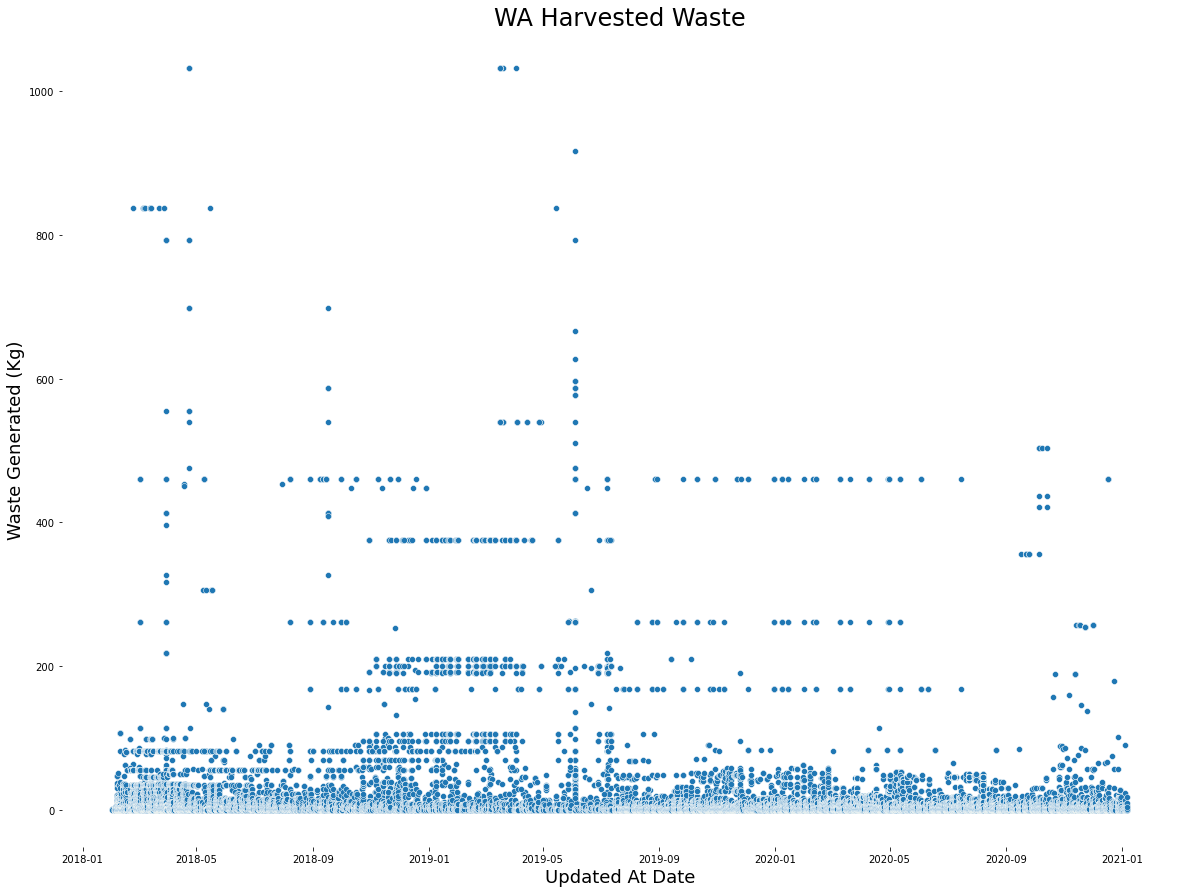

In [99]:
fig, scatter = plt.subplots(figsize = (20,15))
scatter = sns.scatterplot(data = wasted_harvested_df, x = 'updated_at', y = "waste_kg");
scatter.set_xlabel('Updated At Date', fontsize = 18);
scatter.set_ylabel('Waste Generated (Kg)', fontsize = 18);
scatter.set_title("WA Harvested Waste", fontsize = 24);
sns.despine(left=True, right=True, top=True, bottom=True)

In [100]:
waste_by_month = wasted_harvested_df.groupby([(wasted_harvested_df.updated_at.dt.year),(wasted_harvested_df.updated_at.dt.month)]).sum()
waste_by_month.index.set_names(['year', 'month'], inplace=True)
waste_by_month['month_year'] =waste_by_month.index.get_level_values(level=1).astype('string') + '-' +  waste_by_month.index.get_level_values(level=0).astype('string')

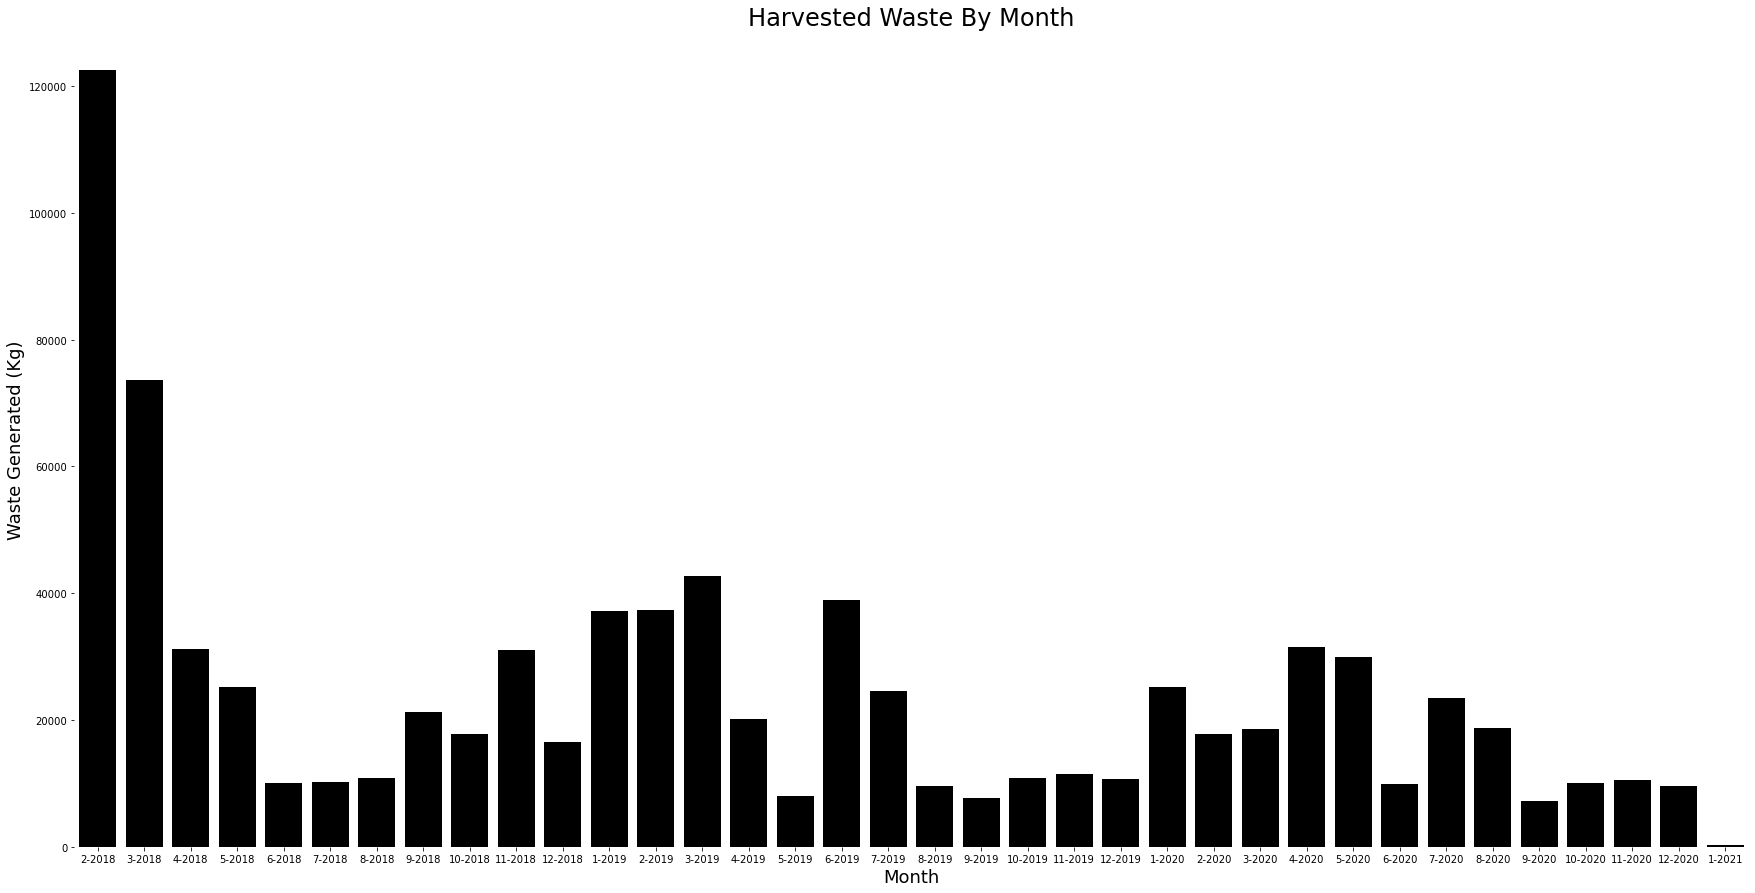

In [101]:
fig, bar = plt.subplots(figsize = (30,15))
bar = sns.barplot(x = 'month_year',  y = 'waste_kg', data=waste_by_month, color='black');
bar.set_xlabel('Month', fontsize = 18);
bar.set_ylabel('Waste Generated (Kg)', fontsize = 18);
bar.set_title("Harvested Waste By Month", fontsize = 24);
sns.despine(left=True, right=True, top=True, bottom=True)

The values for 2/2018 and 3/2018 are much higher than the other months and since values of this magnitude are not repeated anywhere elese they are most likely outliers.  The value for 1/2021 is much lower than the other months and is likely due to incomplete data.  Removing these months will give a more representative view of the data.

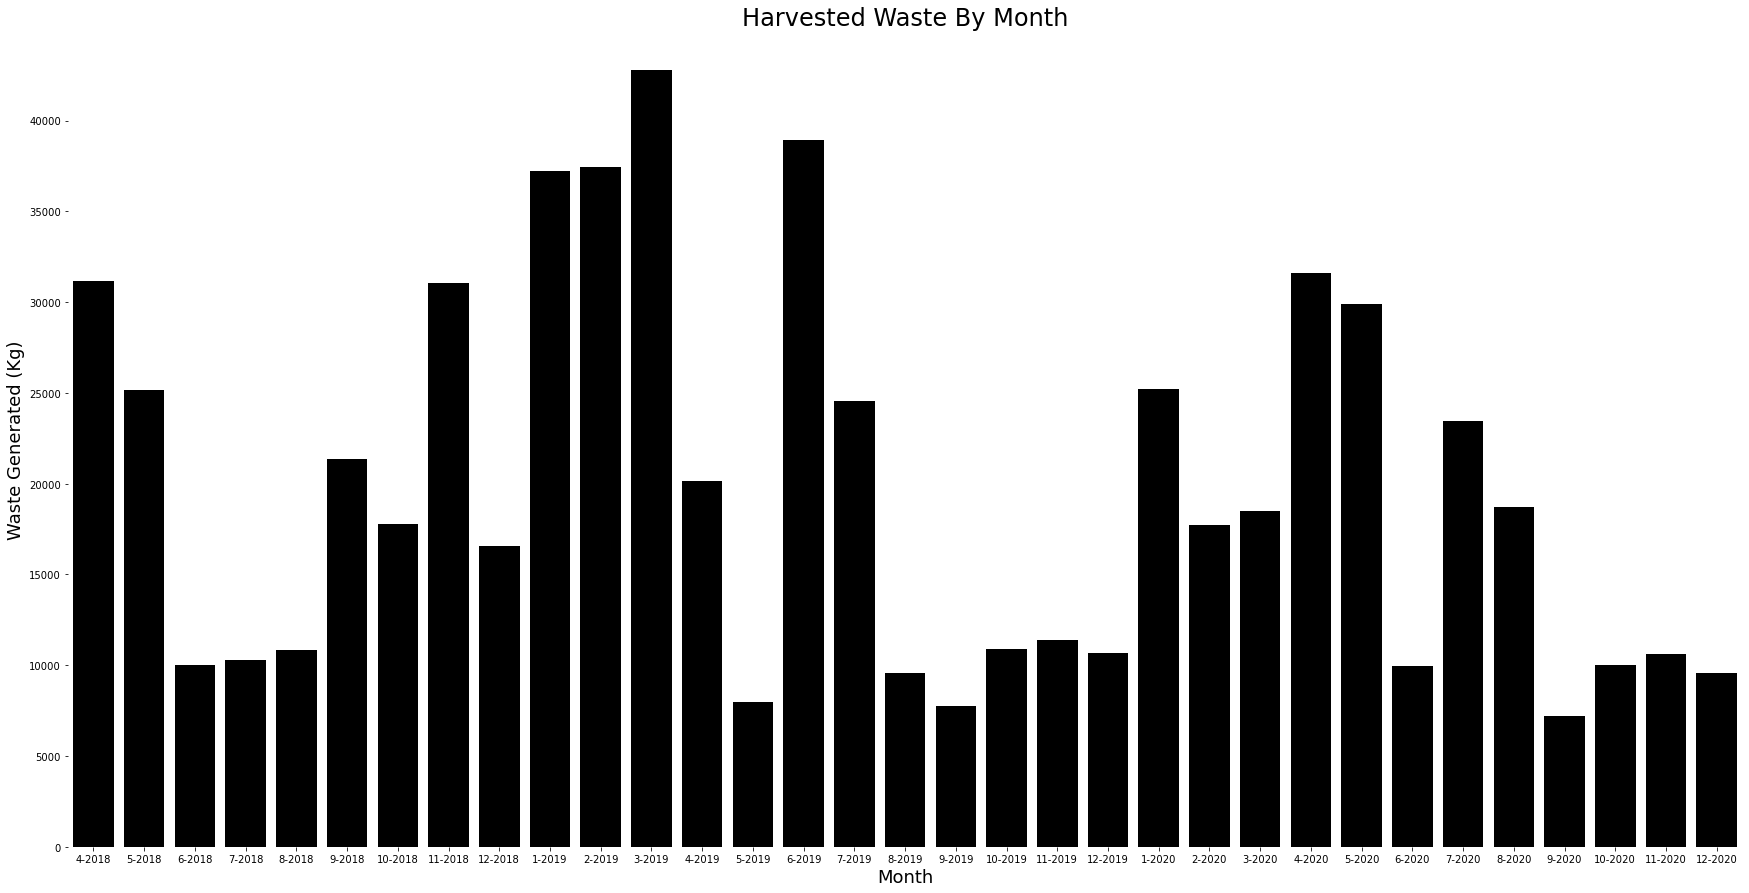

In [102]:
fig, bar = plt.subplots(figsize = (30,15))
bar = sns.barplot(x = 'month_year',  y = 'waste_kg', data=waste_by_month[2:-1], color='black');
bar.set_xlabel('Month', fontsize = 18);
bar.set_ylabel('Waste Generated (Kg)', fontsize = 18);
bar.set_title("Harvested Waste By Month", fontsize = 24);
sns.despine(left=True, right=True, top=True, bottom=True)

It appears that the amount of waste generated has decreased over time and is stablizing.  It also appears that the amount of waste generated is lower during the time period of Septmber though December.  There isn't enough data to make any definate conclusions.

In [103]:
wasted_harvested_df = wasted_harvested_df[(wasted_harvested_df.updated_at.dt.date > pd.Timestamp(2018,3,31)) & (wasted_harvested_df.updated_at.dt.date < pd.Timestamp(2021,1,1))]

In [104]:
wasted_harvested_df

,global_id,created_at,updated_at,mme_id,user_id,external_id,uom,harvested_at,batch_created_at,num_plants,status,strain_id,is_parent_batch,is_child_batch,type,harvest_stage,qty_packaged_flower,qty_packaged_by_product,packaged_completed_at,area_id,origin,plant_stage,deleted_at,flower_dry_weight,waste,other_dry_weight,harvested_end_at,flower_wet_weight,other_wet_weight,waste_kg,update_date
55716,WAJ413090.BA16ZP,2018-02-01 03:37:02,2019-03-06 14:10:11,WAWA1.MMQP,WAWA1.USQN,<NA>,ea,2017-03-09 09:24:00,1900-01-01 00:00:00,0,open,WAJ413090.ST77P,False,False,harvest,cure,0.00,0.00,1900-01-01,WAJ413090.AR2AS,plant,harvested,NaT,98.00,248.33,168.75,2017-03-09 09:24:00,461.67,0.00,0.25,2019-03-06
66498,WAJ412235.BA1FB7,2018-02-01 04:59:35,2019-06-04 06:53:49,WAWA1.MMN,WAWA1.US69,<NA>,ea,2018-01-23 01:35:00,1900-01-01 00:00:00,0,closed,WAJ412235.STCLQ,False,False,harvest,finished,0.00,0.00,1900-01-01,WAJ412235.AR3E4,plant,harvested,NaT,1143.17,2376.85,6123.00,2018-01-23 01:35:00,64638.60,0.00,2.38,2019-06-04
66581,WAJ412235.BA1FDI,2018-02-01 04:59:58,2019-06-04 06:53:56,WAWA1.MMN,WAWA1.US69,<NA>,ea,2018-01-28 08:31:00,1900-01-01 00:00:00,0,closed,WAJ412235.STCK5,False,False,harvest,finished,0.00,0.00,1900-01-01,WAJ412235.AR3E4,plant,harvested,NaT,660.00,2876.55,1711.11,2018-01-28 08:31:00,15840.96,0.00,2.88,2019-06-04
66619,WAJ412235.BA1FEK,2018-02-01 05:00:08,2019-06-04 06:53:50,WAWA1.MMN,WAWA1.US69,<NA>,ea,2018-01-28 08:33:00,1900-01-01 00:00:00,0,closed,WAJ412235.STCN5,False,False,harvest,finished,0.00,0.00,1900-01-01,WAJ412235.AR3E4,plant,harvested,NaT,128.00,463.91,471.00,2018-01-28 08:33:00,6718.00,0.00,0.46,2019-06-04
71785,WAJ413712.BA1JE2,2018-02-01 05:47:46,2019-06-04 06:57:26,WAWA1.MMCX,WAWA1.USVQ,<NA>,ea,2018-01-23 01:53:00,1900-01-01 00:00:00,0,closed,WAJ413712.STF1N,False,False,harvest,finished,0.00,0.00,1900-01-01,WAJ413712.AR3YP,plant,harvested,NaT,4954.00,11520.00,1630.00,2018-01-23 01:53:00,69304.62,0.00,11.52,2019-06-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37486621,WAJ412446.BAMBSX4,2020-12-31 04:45:37,2020-12-31 04:45:37,WAWA1.MMIY,WAWA1.US1WH,66,gm,2020-11-09 09:59:00,2020-11-23 03:29:48,127,open,WAJ412446.STQN0K,True,True,harvest,finished,0.00,0.00,1900-01-01,WAJ412446.AR36KF,clone,harvested,NaT,0.00,5020.00,0.00,NaT,57435.87,9219.52,5.02,2020-12-31
37486622,WAJ412446.BAMBSX5,2020-12-31 04:45:37,2020-12-31 04:45:37,WAWA1.MMIY,WAWA1.US1WH,62,gm,2020-11-09 09:49:00,2020-11-23 03:31:12,75,open,WAJ412446.STNVVP,True,True,harvest,finished,0.00,0.00,1900-01-01,WAJ412446.AR36KF,clone,harvested,NaT,0.00,2500.00,0.00,NaT,24143.66,7762.02,2.50,2020-12-31
37486623,WAJ412446.BAMBSX6,2020-12-31 04:45:38,2020-12-31 04:45:38,WAWA1.MMIY,WAWA1.US1WH,63,gm,2020-11-09 09:52:00,2020-11-23 03:21:31,52,open,WAJ412446.STQ03V,True,True,harvest,finished,0.00,0.00,1900-01-01,WAJ412446.AR36KF,clone,harvested,NaT,0.00,1000.00,0.00,NaT,18019.97,7363.03,1.00,2020-12-31
37489321,WAJ413075.BAMBV04,2020-12-31 05:41:01,2020-12-31 05:42:02,WAWA1.MMDM,WAWA1.USB7,2751,gm,2020-12-22 10:31:00,2020-12-31 05:41:01,48,closed,WAJ413075.STNVUM,True,True,harvest,finished,2014.00,0.00,1900-01-01,WAJ413075.AR2SNL,clone,harvested,NaT,0.00,1064.00,0.00,NaT,10007.38,0.00,1.06,2020-12-31


Group the data by producer and date

In [105]:
waste_by_producer = wasted_harvested_df.groupby(['mme_id', 'update_date']).agg({'waste_kg': ['sum']})

In [106]:
waste_by_producer.head(20)

waste_kg
                             sum
mme_id      update_date         
WAWA1.MM100 2019-07-08    415.10
            2019-07-28      0.76
            2019-08-14      0.33
            2019-08-19      0.55
            2019-11-21      0.50
WAWA1.MM101 2018-04-19     22.19
            2018-04-24      1.39
            2018-04-25     81.67
            2018-04-26      0.96
            2018-05-15      4.50
            2018-09-05      8.03
            2019-07-29      1.07
            2020-01-17      4.00
            2020-03-27      9.79
            2020-04-03      4.90
            2020-07-17      0.86
            2020-12-11      4.46
WAWA1.MM102 2018-05-15     53.98
            2018-06-30      2.12
WAWA1.MM103 2018-04-06     99.43

In [107]:
waste_by_producer.tail(20)

waste_kg
                            sum
mme_id     update_date         
WAWA1.MMZW 2018-12-23     11.70
           2019-01-02     44.32
           2020-01-23      1.75
           2020-01-30      5.24
           2020-12-01      9.13
WAWA1.MMZX 2020-01-29     10.49
WAWA1.MMZY 2018-08-30     23.58
           2018-10-10     86.49
           2019-03-04     59.18
           2020-01-13      2.40
           2020-01-24     10.93
           2020-03-24     14.69
           2020-12-01      9.13
WAWA1.MMZZ 2018-05-15     46.58
           2018-06-22     14.63
           2018-07-13      2.02
           2020-02-11      7.46
           2020-03-13      0.00
           2020-04-13      4.00
           2020-11-19      0.95

In [108]:
avg_waste_by_producer = wasted_harvested_df.groupby(['mme_id']).agg({'waste_kg': ['mean', 'median']}).reset_index()
avg_waste_by_producer.columns = ['mme_id', 'mean', 'median']
avg_waste_by_producer

,mme_id,mean,median
0,WAWA1.MM100,29.80,0.28
1,WAWA1.MM101,6.25,0.96
2,WAWA1.MM102,11.22,7.55
3,WAWA1.MM103,74.53,74.38
4,WAWA1.MM105,1.36,1.01
...,...,...,...
1071,WAWA1.MMZV,8.53,2.48
1072,WAWA1.MMZW,5.81,2.37
1073,WAWA1.MMZX,5.24,5.24
1074,WAWA1.MMZY,6.07,3.22


In [109]:
avg_waste_by_producer.sort_values(by = 'median', ascending = False, inplace = True)

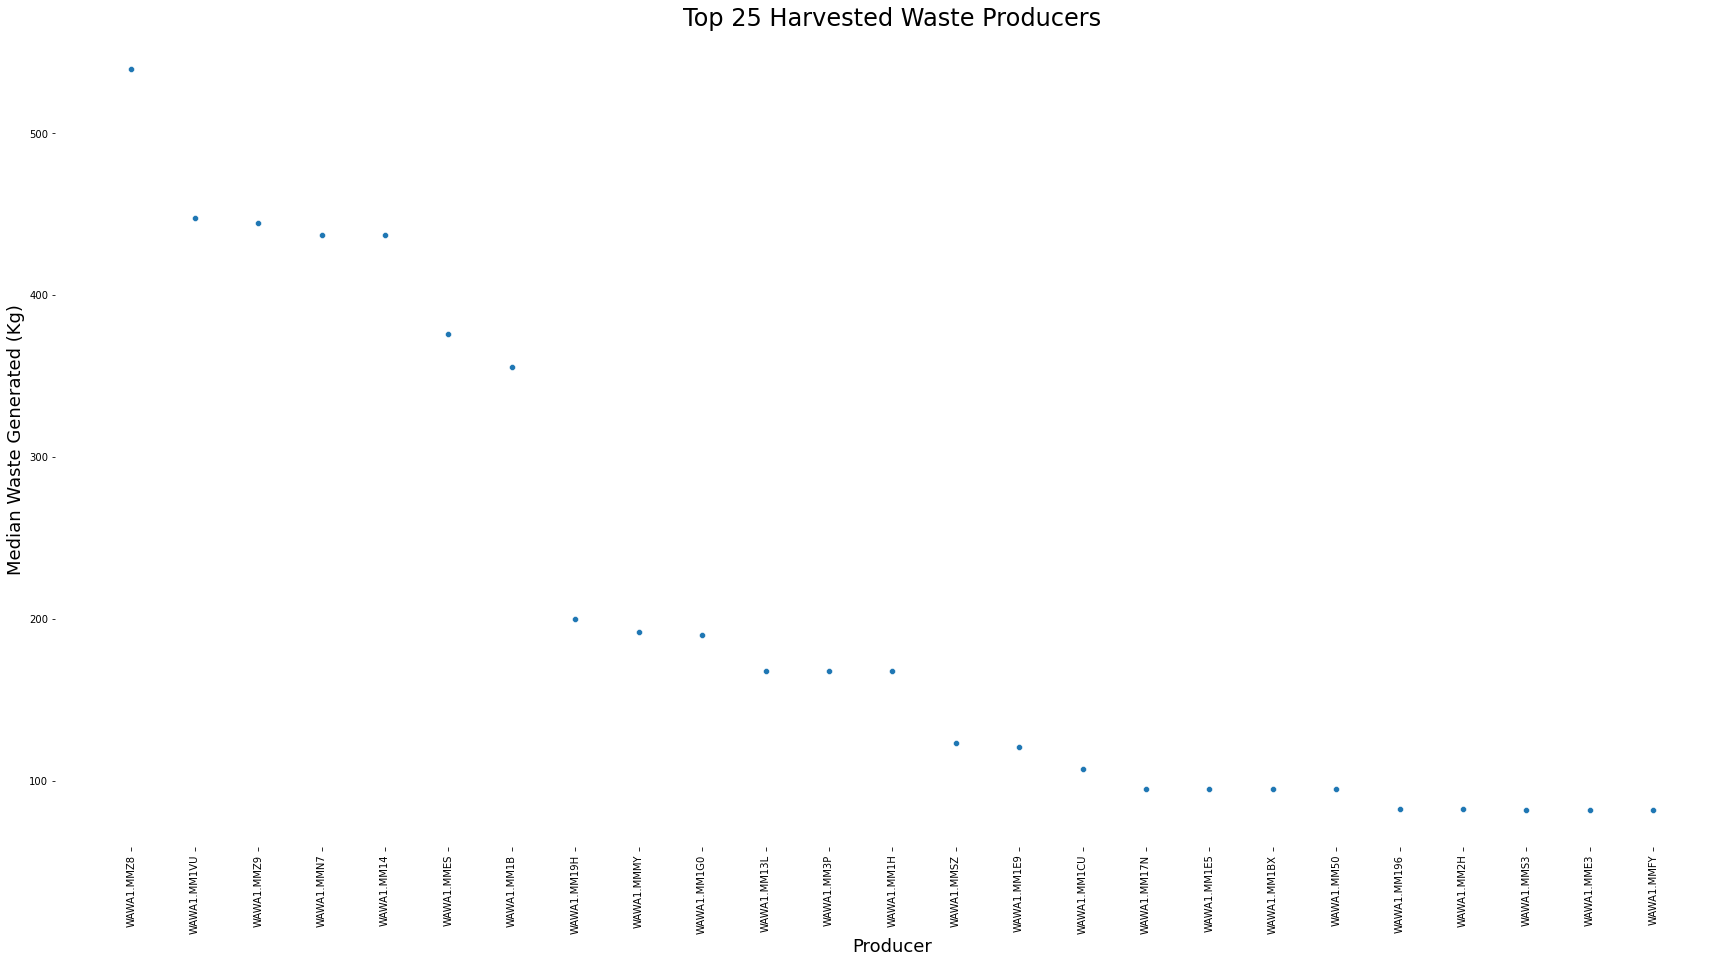

In [110]:
fig, scatter = plt.subplots(figsize = (30,15))
scatter = sns.scatterplot(data = avg_waste_by_producer[:25], x = 'mme_id', y = 'median');
plt.xticks(rotation=90);
scatter.set_xlabel('Producer', fontsize = 18);
scatter.set_ylabel('Median Waste Generated (Kg)', fontsize = 18);
scatter.set_title("Top 25 Harvested Waste Producers", fontsize = 24);
sns.despine(left=True, right=True, top=True, bottom=True)

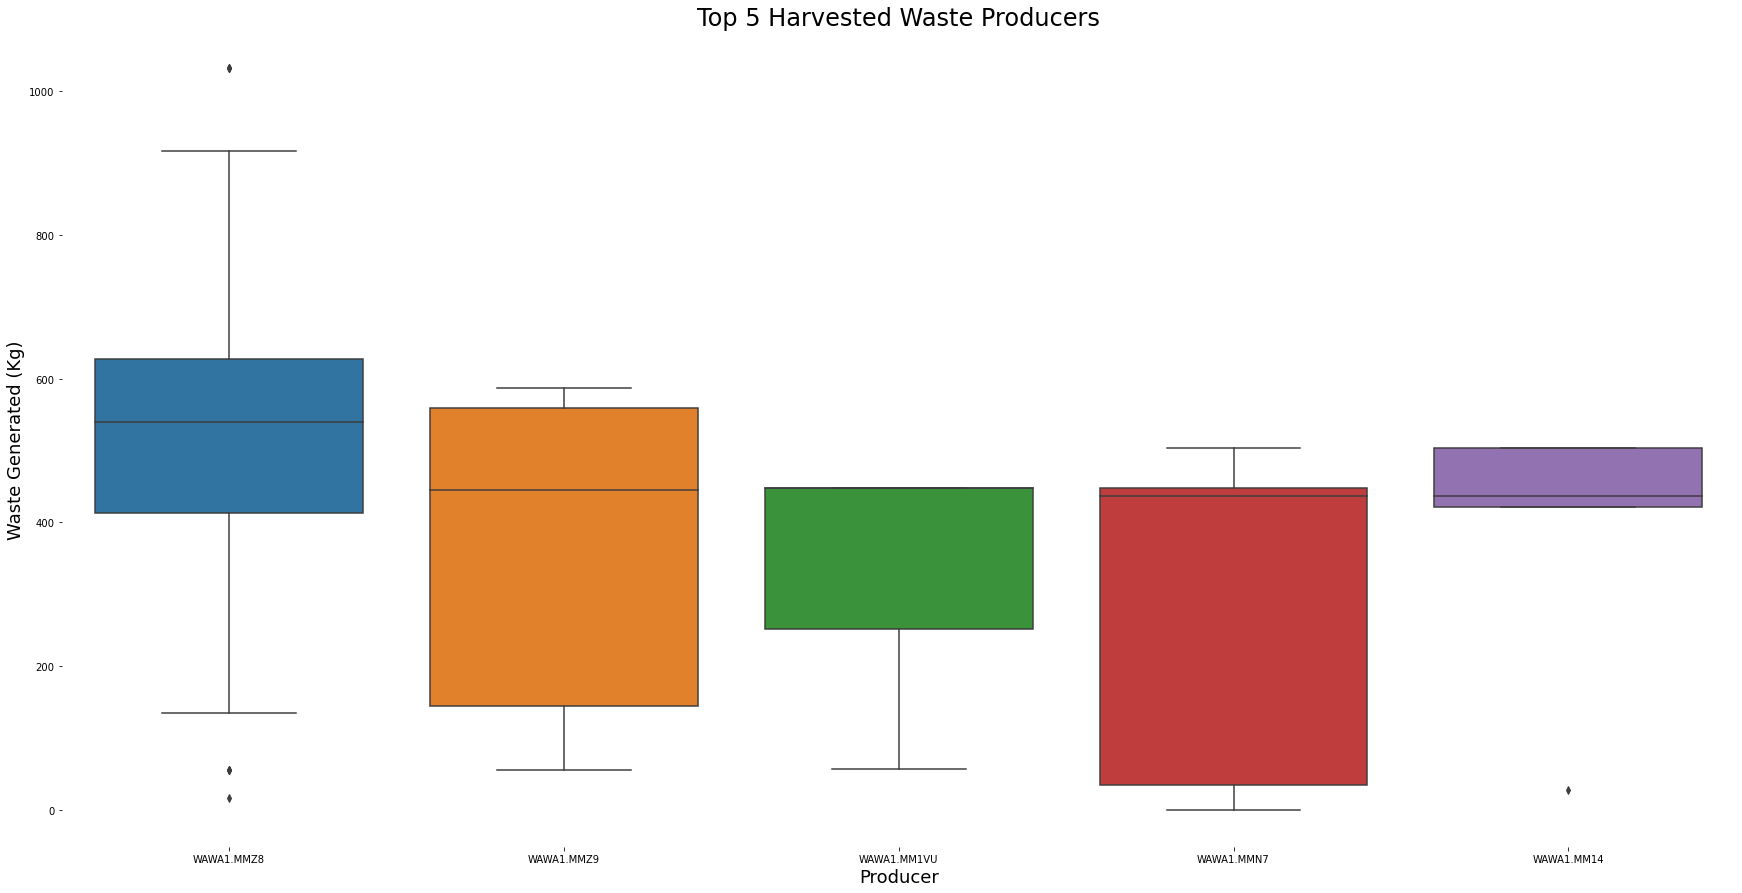

In [111]:
fig, bp = plt.subplots(figsize = (30,15))
bp = sns.boxplot(x = 'mme_id',  y = 'waste_kg', data=wasted_harvested_df[wasted_harvested_df.mme_id.isin(avg_waste_by_producer[:5].mme_id)]);
bp.set_xlabel('Producer', fontsize = 18);
bp.set_ylabel('Waste Generated (Kg)', fontsize = 18);
bp.set_title("Top 5 Harvested Waste Producers", fontsize = 24);
sns.despine(left=True, right=True, top=True, bottom=True)

In [112]:
top_ten_producers_df = wasted_harvested_df[wasted_harvested_df.mme_id.isin(avg_waste_by_producer[:10].mme_id)]
top_ten_producers_df

,global_id,created_at,updated_at,mme_id,user_id,external_id,uom,harvested_at,batch_created_at,num_plants,status,strain_id,is_parent_batch,is_child_batch,type,harvest_stage,qty_packaged_flower,qty_packaged_by_product,packaged_completed_at,area_id,origin,plant_stage,deleted_at,flower_dry_weight,waste,other_dry_weight,harvested_end_at,flower_wet_weight,other_wet_weight,waste_kg,update_date
310367,WAJ423115.BA6NHD,2018-02-03 12:43:45,2019-04-03 00:42:44,WAWA1.MMZ8,WAWA1.USWC,<NA>,ea,2017-12-06 04:48:00,1900-01-01 00:00:00,0,closed,WAJ423115.STT90,False,False,harvest,finished,0.00,0.00,1900-01-01,WAJ423115.AR90Y,plant,harvested,NaT,20411.00,55650.00,49894.00,2017-12-06 04:48:00,487156.94,0.00,55.65,2019-04-03
310368,WAJ423115.BA6NHE,2018-02-03 12:43:45,2019-04-03 00:44:22,WAWA1.MMZ8,WAWA1.USWC,<NA>,ea,2017-12-06 05:03:00,1900-01-01 00:00:00,0,closed,WAJ423115.STT9A,False,False,harvest,finished,0.00,0.00,1900-01-01,WAJ423115.AR90Y,plant,harvested,NaT,45354.75,1031922.00,49892.00,2017-12-06 05:03:00,341101.16,0.00,1031.92,2019-04-03
310370,WAJ423115.BA6NHG,2018-02-03 12:43:46,2019-06-04 07:24:35,WAWA1.MMZ8,WAWA1.USWC,<NA>,ea,2017-11-05 01:46:00,1900-01-01 00:00:00,27,closed,WAJ423115.STT7O,False,False,harvest,finished,0.00,0.00,1900-01-01,WAJ423115.AR90Y,plant,harvested,NaT,15873.96,197283.00,63501.00,2018-10-11 07:54:00,751622.88,0.00,197.28,2019-06-04
310375,WAJ423115.BA6NHL,2018-02-03 12:43:48,2019-06-04 07:24:37,WAWA1.MMZ8,WAWA1.USWC,<NA>,ea,2017-12-06 05:06:00,1900-01-01 00:00:00,0,closed,WAJ423115.STT95,False,False,harvest,finished,0.00,0.00,1900-01-01,WAJ423115.AR90Y,plant,harvested,NaT,40821.01,793786.00,99788.00,2017-12-06 05:06:00,78471.00,0.00,793.79,2019-06-04
310376,WAJ423115.BA6NHM,2018-02-03 12:43:49,2019-06-04 07:24:37,WAWA1.MMZ8,WAWA1.USWC,<NA>,ea,2017-11-21 02:22:00,1900-01-01 00:00:00,0,closed,WAJ423115.STT95,False,False,harvest,finished,0.00,0.00,1900-01-01,WAJ423115.AR90Y,plant,harvested,NaT,22677.97,412768.00,54428.00,2017-11-21 02:22:00,61233.90,0.00,412.77,2019-06-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35153652,WAG413656.BAKXSQY,2020-10-14 03:24:40,2020-10-14 03:25:29,WAWA1.MMN7,WAWA1.USL0,10,gm,2020-10-05 08:55:00,2020-10-05 02:15:08,10000,open,WAG413656.STHLIN,True,True,harvest,finished,0.00,0.00,1900-01-01,WAG413656.AR5YZV,clone,harvested,NaT,0.00,436993.25,0.00,NaT,5141097.00,0.00,436.99,2020-10-14
35153653,WAG413656.BAKXSQZ,2020-10-14 03:24:40,2020-10-14 03:24:40,WAWA1.MMN7,WAWA1.USL0,9,gm,2020-10-05 08:45:00,2020-10-05 02:17:11,10000,open,WAG413656.STHLIN,False,True,harvest,finished,0.00,0.00,1900-01-01,WAG413656.AR5YZV,multiple,harvested,NaT,0.00,421569.94,0.00,NaT,5141097.00,0.00,421.57,2020-10-14
35153654,WAG413656.BAKXSR0,2020-10-14 03:24:40,2020-10-14 03:36:25,WAWA1.MMN7,WAWA1.USL0,11,gm,2020-10-05 08:57:00,2020-10-05 02:20:44,1129,open,WAG413656.STHLIN,True,True,harvest,finished,1028220.00,0.00,1900-01-01,WAG413656.AR5YZV,clone,harvested,NaT,0.00,503827.50,0.00,NaT,5536566.00,0.00,503.83,2020-10-14
35823287,WAJ430057.BALC5GH,2020-11-04 02:50:51,2020-11-04 03:13:38,WAWA1.MM14,WAWA1.US1T,12,gm,2020-11-04 10:41:00,2020-11-04 02:50:51,1000,closed,WAJ412118.STHH69,False,True,harvest,finished,131120.84,0.00,1900-01-01,WAJ430057.AR5IYH,multiple,harvested,NaT,0.00,28097.32,0.00,NaT,2497540.00,0.00,28.10,2020-11-04


# Destroyed Waste
Oddly there is no waste when a product is destroyed

In [113]:
batches_df[(batches_df.plant_stage == 'destroyed') & (batches_df.waste > 0)]

,global_id,created_at,updated_at,mme_id,user_id,external_id,uom,harvested_at,batch_created_at,num_plants,status,strain_id,is_parent_batch,is_child_batch,type,harvest_stage,qty_packaged_flower,qty_packaged_by_product,packaged_completed_at,area_id,origin,plant_stage,deleted_at,flower_dry_weight,waste,other_dry_weight,harvested_end_at,flower_wet_weight,other_wet_weight,waste_kg


# Growing Waste
What is this and is it a real thing or are these misclassified entries?

In [114]:
growing_waste_df = batches_df[(batches_df.plant_stage == 'growing') & (batches_df.waste > 0) & (batches_df.updated_at.dt.date > pd.Timestamp(2018,3,31)) & (batches_df.updated_at.dt.date < pd.Timestamp(2021,1,1))].copy()

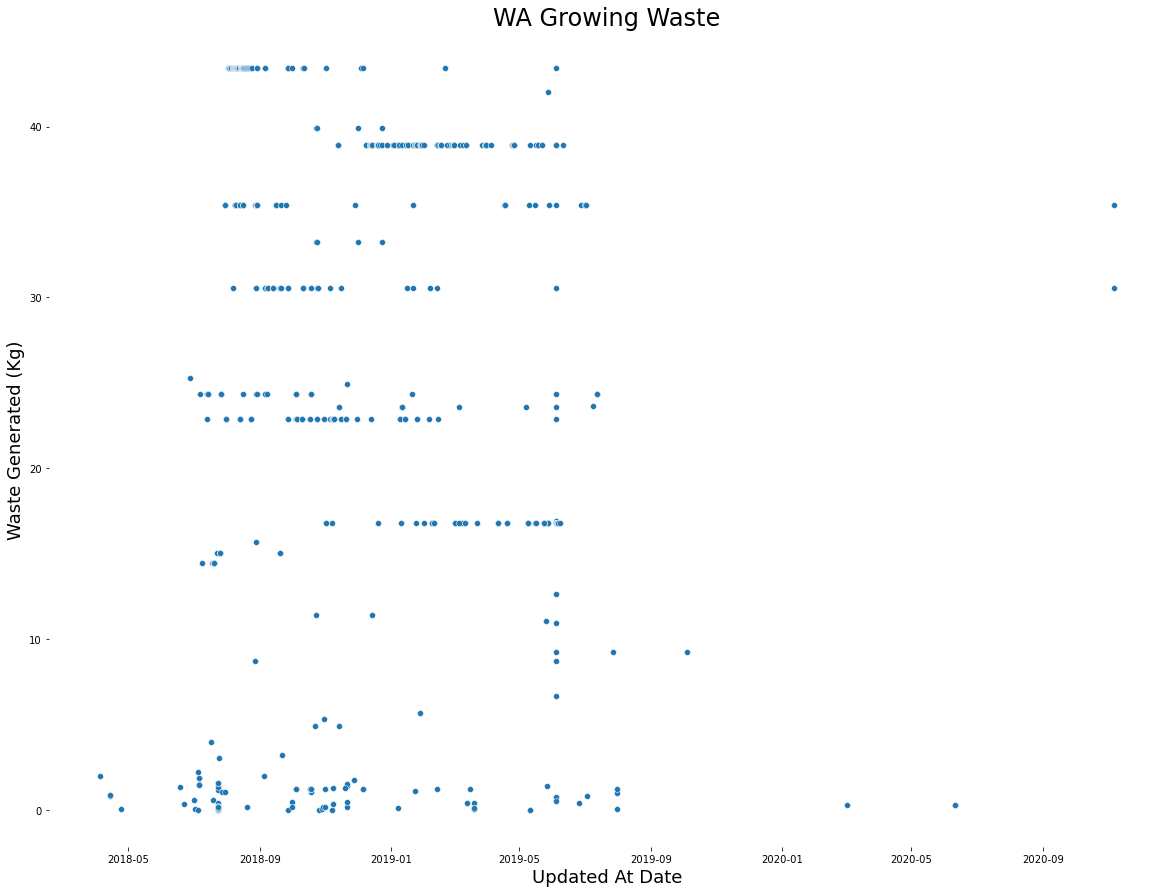

In [115]:
fig, scatter = plt.subplots(figsize = (20,15))
scatter = sns.scatterplot(data = growing_waste_df, x = 'updated_at', y = "waste_kg");
scatter.set_xlabel('Updated At Date', fontsize = 18);
scatter.set_ylabel('Waste Generated (Kg)', fontsize = 18);
scatter.set_title("WA Growing Waste", fontsize = 24);
sns.despine(left=True, right=True, top=True, bottom=True)

In [116]:
waste_by_month = growing_waste_df.groupby([(growing_waste_df.updated_at.dt.year),(growing_waste_df.updated_at.dt.month)]).sum()
waste_by_month.index.set_names(['year', 'month'], inplace=True)
waste_by_month['month_year'] =waste_by_month.index.get_level_values(level=1).astype('string') + '-' +  waste_by_month.index.get_level_values(level=0).astype('string')

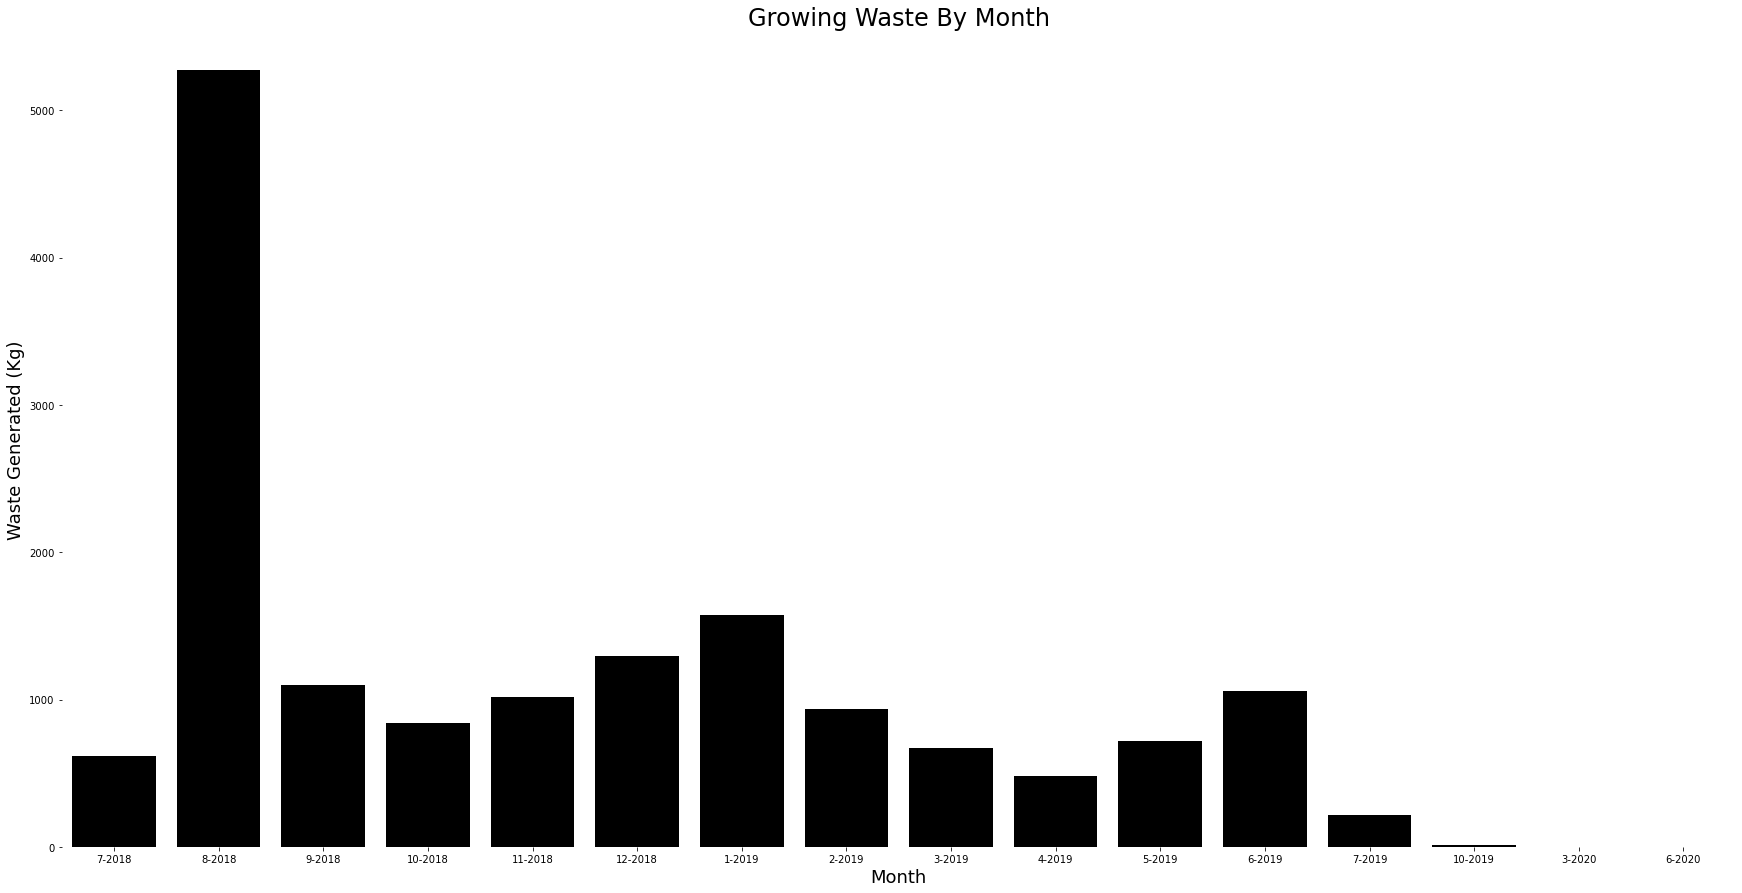

In [117]:
fig, bar = plt.subplots(figsize = (30,15))
bar = sns.barplot(x = 'month_year',  y = 'waste_kg', data=waste_by_month[2:-1], color='black');
bar.set_xlabel('Month', fontsize = 18);
bar.set_ylabel('Waste Generated (Kg)', fontsize = 18);
bar.set_title("Growing Waste By Month", fontsize = 24);
sns.despine(left=True, right=True, top=True, bottom=True)

In [118]:
growing_waste_df['update_date'] = growing_waste_df.updated_at.dt.date
waste_by_producer = growing_waste_df.groupby(['mme_id', 'update_date']).agg({'waste_kg': ['sum']})

In [119]:
waste_by_producer.head(20)

waste_kg
                             sum
mme_id      update_date         
WAWA1.MM101 2018-08-06     43.40
            2019-05-09     33.56
WAWA1.MM102 2018-08-18     43.40
WAWA1.MM109 2018-08-15     43.40
WAWA1.MM10A 2018-08-07     43.40
            2019-04-19     16.78
            2019-05-24     50.34
WAWA1.MM10C 2018-08-14     43.40
WAWA1.MM10G 2018-08-14     43.40
WAWA1.MM10J 2019-01-17     38.90
WAWA1.MM10N 2019-01-25     45.80
WAWA1.MM111 2018-08-15     43.40
WAWA1.MM117 2018-08-04     43.40
WAWA1.MM11A 2018-08-06     43.40
WAWA1.MM11C 2018-08-18     43.40
WAWA1.MM11D 2019-01-09     45.80
            2019-04-17     35.40
WAWA1.MM11G 2018-08-27     35.40
WAWA1.MM11J 2018-08-07     43.40
WAWA1.MM11M 2018-08-15     43.40

In [120]:
waste_by_producer.tail(20)

waste_kg
                            sum
mme_id     update_date         
WAWA1.MMXX 2019-01-17     38.90
           2019-02-01     38.90
WAWA1.MMXZ 2018-08-16     43.40
WAWA1.MMY0 2019-07-27      9.21
           2019-10-04      9.21
WAWA1.MMY1 2018-11-30     22.90
WAWA1.MMY6 2018-10-01      0.14
WAWA1.MMY7 2018-10-31      0.14
           2019-01-23     77.80
           2019-02-22     38.90
WAWA1.MMZ3 2018-08-14     43.40
WAWA1.MMZ6 2019-07-03      0.78
WAWA1.MMZA 2018-08-15     43.40
WAWA1.MMZB 2018-08-16     43.40
           2018-08-29     86.80
WAWA1.MMZE 2019-06-04      8.69
WAWA1.MMZM 2018-08-22     43.40
WAWA1.MMZN 2019-02-16     38.90
WAWA1.MMZO 2019-07-01     35.40
WAWA1.MMZS 2018-08-20     43.40

In [121]:
avg_waste_by_producer = growing_waste_df.groupby(['mme_id']).agg({'waste_kg': ['mean', 'median']}).reset_index()
avg_waste_by_producer.columns = ['mme_id', 'mean', 'median']
avg_waste_by_producer

,mme_id,mean,median
0,WAWA1.MM101,25.65,16.78
1,WAWA1.MM102,43.40,43.40
2,WAWA1.MM109,43.40,43.40
3,WAWA1.MM10A,22.10,16.78
4,WAWA1.MM10C,43.40,43.40
...,...,...,...
238,WAWA1.MMZE,8.69,8.69
239,WAWA1.MMZM,43.40,43.40
240,WAWA1.MMZN,38.90,38.90
241,WAWA1.MMZO,35.40,35.40


In [122]:
avg_waste_by_producer.sort_values(by = 'median', ascending = False, inplace = True)

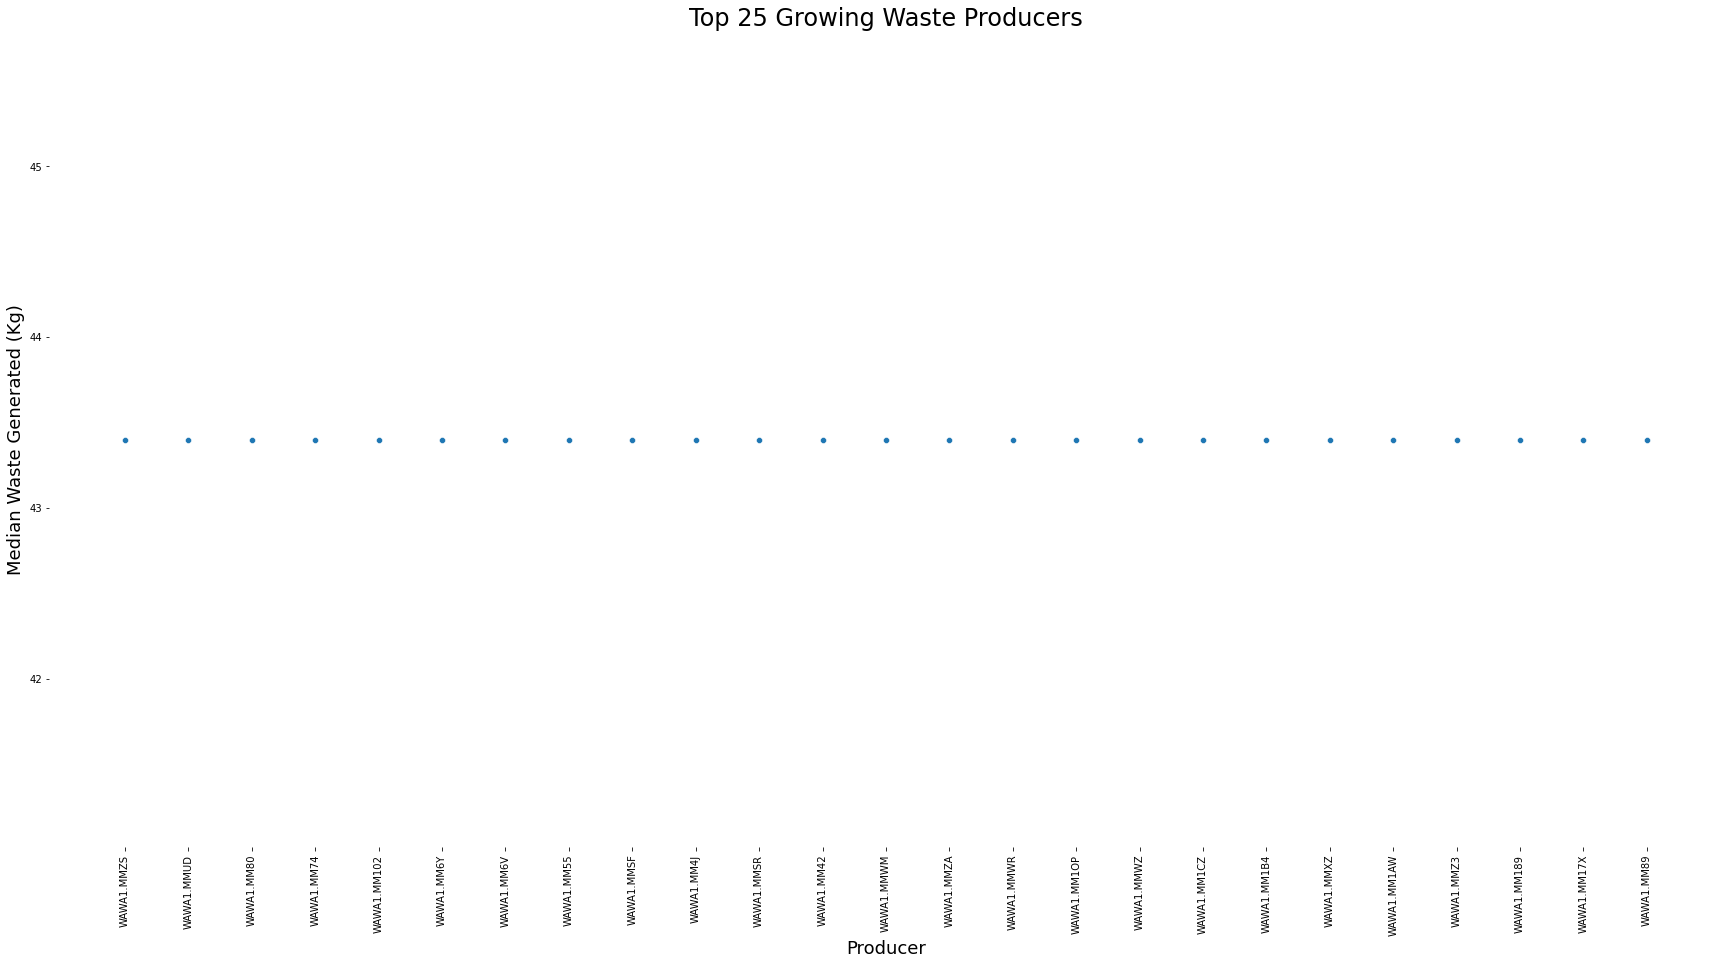

In [123]:
fig, scatter = plt.subplots(figsize = (30,15))
scatter = sns.scatterplot(data = avg_waste_by_producer[:25], x = 'mme_id', y = 'median');
plt.xticks(rotation=90);
scatter.set_xlabel('Producer', fontsize = 18);
scatter.set_ylabel('Median Waste Generated (Kg)', fontsize = 18);
scatter.set_title("Top 25 Growing Waste Producers", fontsize = 24);
sns.despine(left=True, right=True, top=True, bottom=True)

# Flower Waste
Is this a real thing or are these just three misclassified entries?

In [124]:
wasted_flower_df = batches_df[(batches_df.plant_stage == 'flower') & (batches_df.waste > 0)].copy()
wasted_flower_df['update_date'] = wasted_flower_df.updated_at.dt.date
wasted_flower_df = wasted_flower_df.groupby(['mme_id', 'update_date']).agg({'waste': 'sum'})

In [125]:
wasted_flower_df.head()

,,waste
mme_id,update_date,
WAWA1.MM19A,2019-07-21,43.00
WAWA1.MMUT,2019-05-07,102.00
WAWA1.MMVQ,2019-04-24,102.00


# Seedling Waste
What is the average weight of a seedling?<br>
How many seedlings would it take to generate 25,000 Kg of waste? <br>
These numbers seem off.

In [126]:
seedling_waste_df = batches_df[(batches_df.plant_stage == 'seedling') & (batches_df.waste > 0) & (batches_df.updated_at.dt.date > pd.Timestamp(2018,3,31)) & (batches_df.updated_at.dt.date < pd.Timestamp(2021,1,1))].copy()
seedling_waste_df['update_date'] = seedling_waste_df.updated_at.dt.date

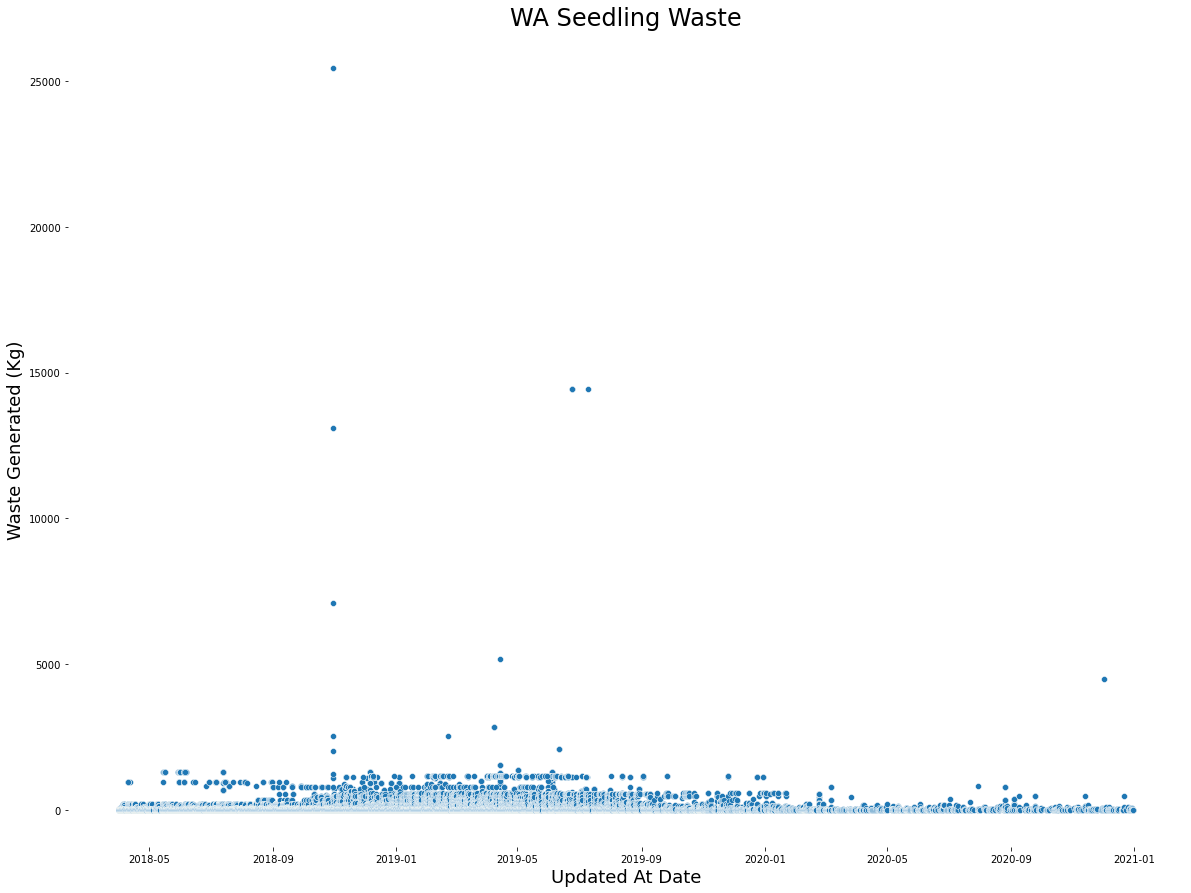

In [127]:
fig, scatter = plt.subplots(figsize = (20,15))
scatter = sns.scatterplot(data = seedling_waste_df, x = 'updated_at', y = "waste_kg");
scatter.set_xlabel('Updated At Date', fontsize = 18);
scatter.set_ylabel('Waste Generated (Kg)', fontsize = 18);
scatter.set_title("WA Seedling Waste", fontsize = 24);
sns.despine(left=True, right=True, top=True, bottom=True)

In [128]:
waste_by_month = seedling_waste_df.groupby([(seedling_waste_df.updated_at.dt.year),(seedling_waste_df.updated_at.dt.month)]).sum()
waste_by_month.index.set_names(['year', 'month'], inplace=True)
waste_by_month['month_year'] =waste_by_month.index.get_level_values(level=1).astype('string') + '-' +  waste_by_month.index.get_level_values(level=0).astype('string')

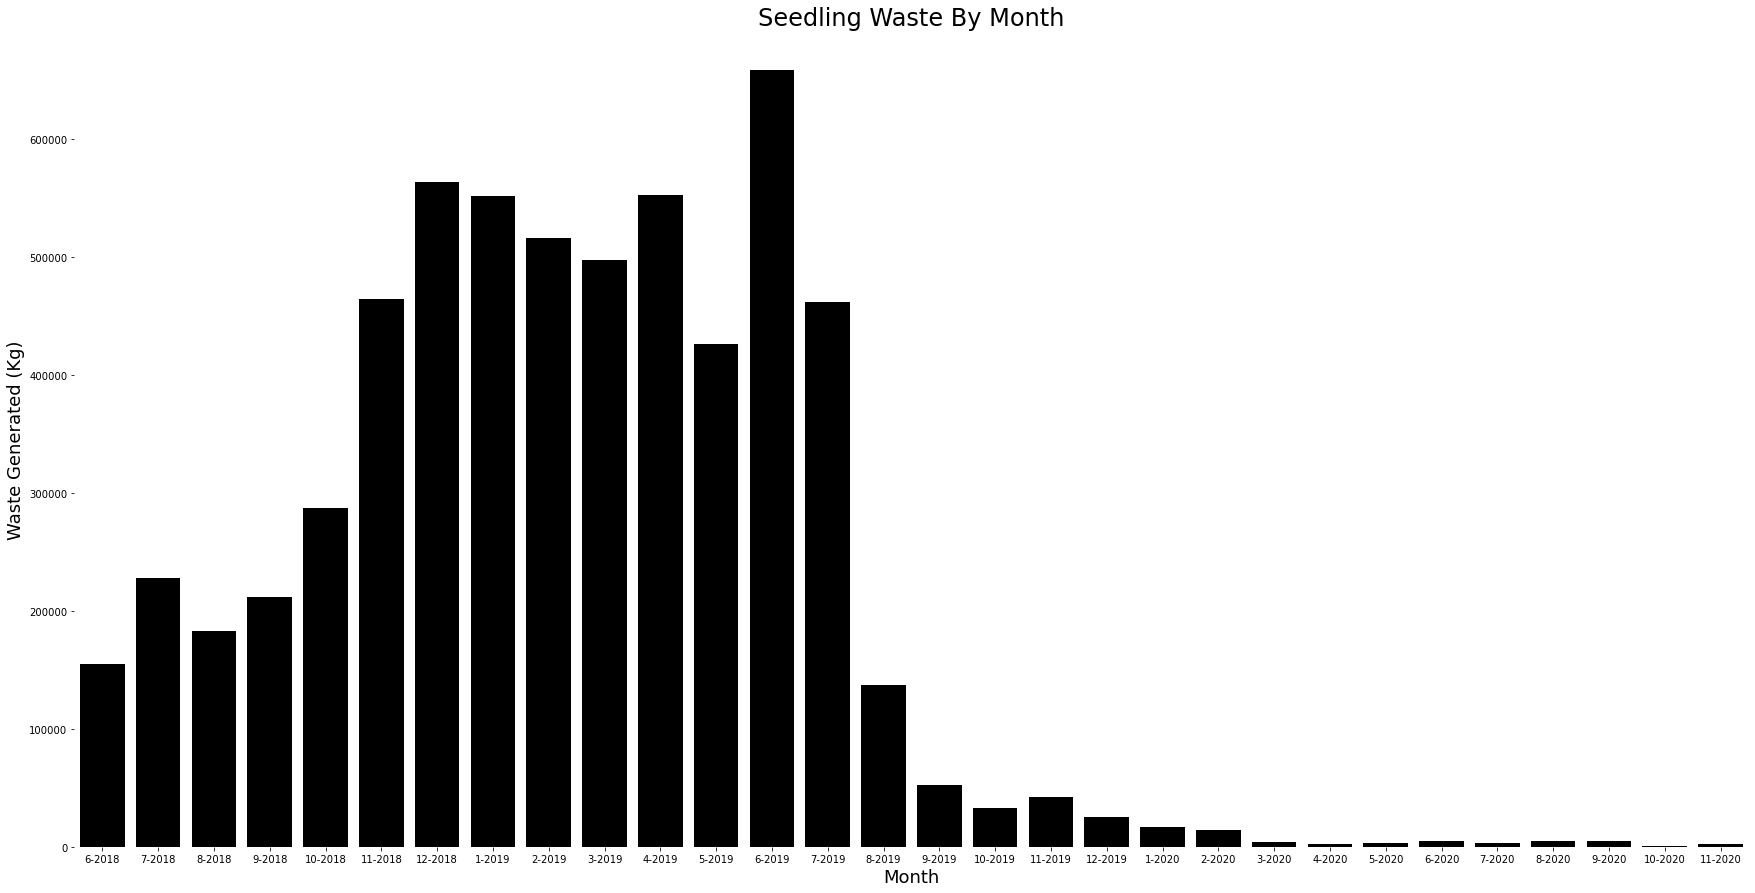

In [129]:
fig, bar = plt.subplots(figsize = (30,15))
bar = sns.barplot(x = 'month_year',  y = 'waste_kg', data=waste_by_month[2:-1], color='black');
bar.set_xlabel('Month', fontsize = 18);
bar.set_ylabel('Waste Generated (Kg)', fontsize = 18);
bar.set_title("Seedling Waste By Month", fontsize = 24);
sns.despine(left=True, right=True, top=True, bottom=True)

In [130]:
waste_by_producer = seedling_waste_df.groupby(['mme_id', 'update_date']).agg({'waste': 'sum'})
waste_by_producer.head(20)

waste
mme_id      update_date          
WAWA1.MM100 2019-06-04   83785.59
            2019-07-08    3136.93
            2019-07-09     325.69
            2019-08-15   14468.92
            2019-11-21     700.00
WAWA1.MM101 2018-04-06   62650.62
            2018-04-19   79373.00
            2018-04-24    9497.00
            2018-04-25    4179.16
            2018-04-26     930.00
            2018-04-27   33280.00
            2018-05-02  718670.00
            2018-05-15    9756.00
            2018-05-17   19512.00
            2018-05-22  149453.72
            2018-05-24     550.00
            2018-05-29   29627.55
            2018-06-04   19582.00
            2018-06-20  118751.86
            2018-06-27    9875.85

In [131]:
waste_by_producer.tail(20)

waste
mme_id     update_date           
WAWA1.MMZZ 2019-04-08    33524.35
           2019-04-09    67576.87
           2019-04-19   326490.62
           2019-04-25   629914.00
           2019-04-30    53010.00
           2019-05-03    54830.00
           2019-05-09    22609.00
           2019-05-10     2649.33
           2019-05-24    89552.00
           2019-06-05     2115.00
           2019-06-06    83032.00
           2019-06-19     2940.00
           2019-06-21  2830804.75
           2019-07-02    29460.00
           2019-07-16  1202299.38
           2019-07-30    23930.00
           2019-08-06   891036.25
           2019-11-21     8960.00
           2019-12-18     4780.00
           2020-04-07   163270.00

In [132]:
avg_waste_by_producer = seedling_waste_df.groupby(['mme_id']).agg({'waste_kg': ['mean', 'median']}).reset_index()
avg_waste_by_producer.columns = ['mme_id', 'mean', 'median']
avg_waste_by_producer

,mme_id,mean,median
0,WAWA1.MM100,1.38,0.68
1,WAWA1.MM101,20.31,2.60
2,WAWA1.MM102,45.89,7.88
3,WAWA1.MM103,8.93,0.79
4,WAWA1.MM105,2.67,2.24
...,...,...,...
1118,WAWA1.MMZV,13.11,2.12
1119,WAWA1.MMZW,15.30,14.09
1120,WAWA1.MMZX,17.99,6.52
1121,WAWA1.MMZY,13.69,10.00


In [133]:
avg_waste_by_producer.sort_values(by = 'median', ascending = False, inplace = True)

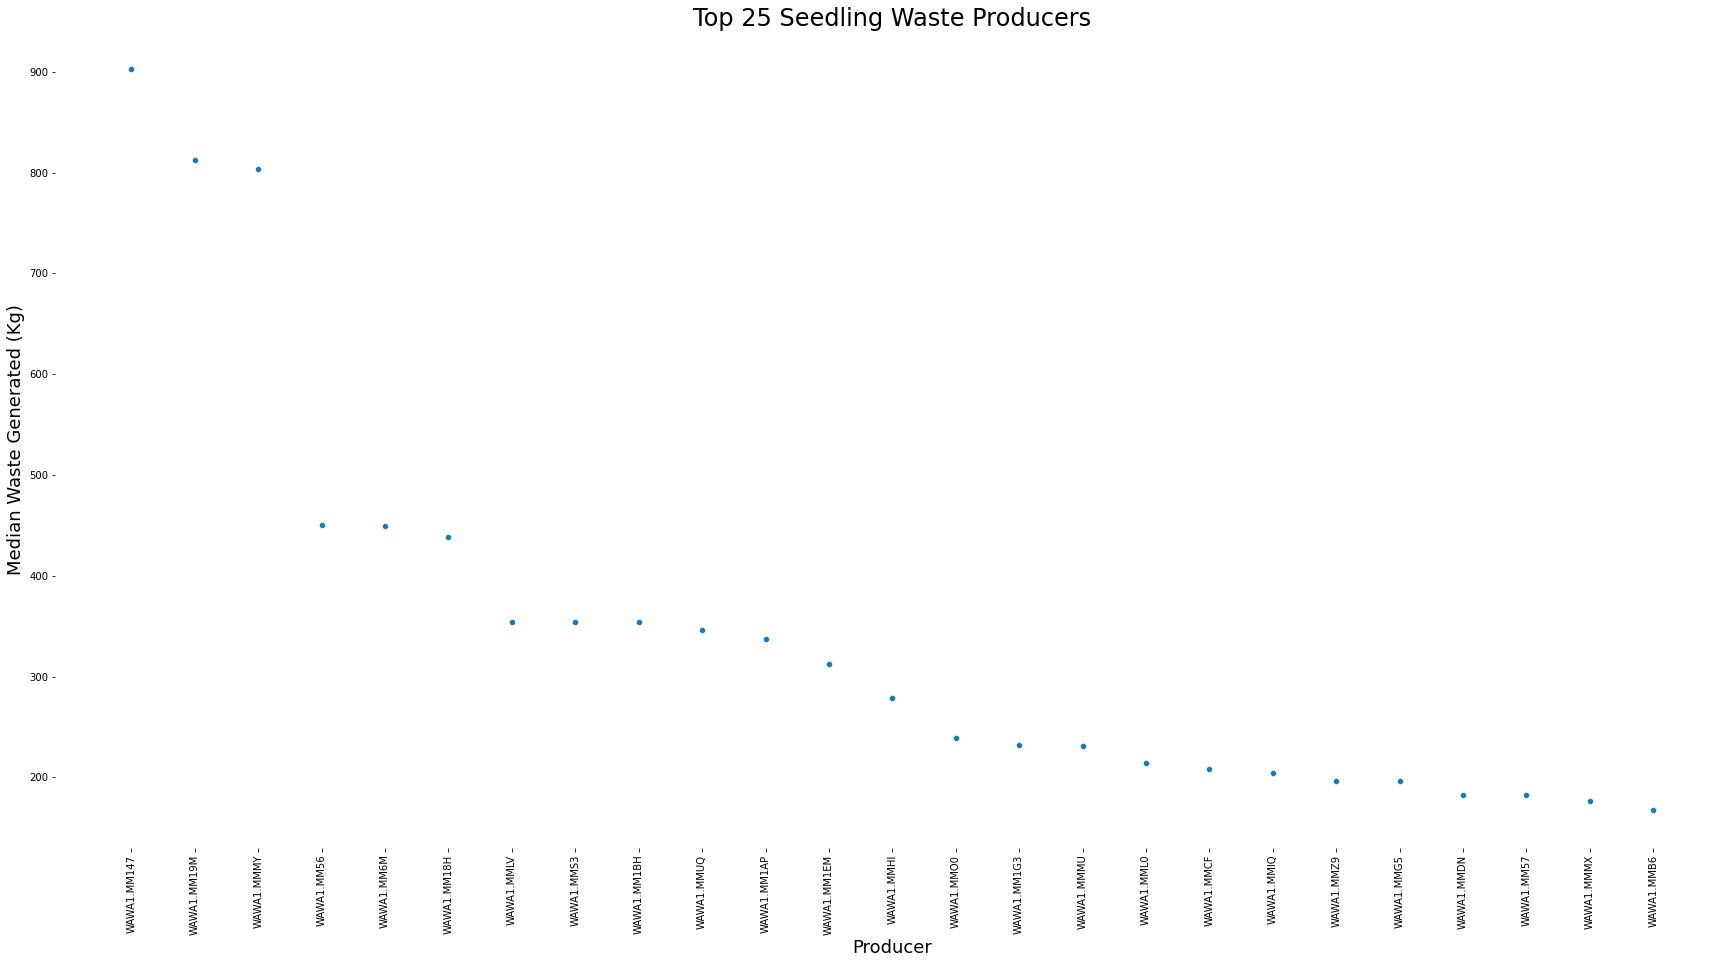

In [134]:
fig, scatter = plt.subplots(figsize = (30,15))
scatter = sns.scatterplot(data = avg_waste_by_producer[:25], x = 'mme_id', y = 'median');
plt.xticks(rotation=90);
scatter.set_xlabel('Producer', fontsize = 18);
scatter.set_ylabel('Median Waste Generated (Kg)', fontsize = 18);
scatter.set_title("Top 25 Seedling Waste Producers", fontsize = 24);
sns.despine(left=True, right=True, top=True, bottom=True)

In [135]:
seedling_waste_df[seedling_waste_df.mme_id.isin(avg_waste_by_producer[:10].mme_id)]

,global_id,created_at,updated_at,mme_id,user_id,external_id,uom,harvested_at,batch_created_at,num_plants,status,strain_id,is_parent_batch,is_child_batch,type,harvest_stage,qty_packaged_flower,qty_packaged_by_product,packaged_completed_at,area_id,origin,plant_stage,deleted_at,flower_dry_weight,waste,other_dry_weight,harvested_end_at,flower_wet_weight,other_wet_weight,waste_kg,update_date
3587315,WAJ414027.BA24W39,2018-02-18 09:29:25,2018-08-15 11:29:48,WAWA1.MM19M,WAWA1.US31U,H17_BDC,gm,2017-10-08 17:00:00,2018-02-18 09:29:25,0,open,WAJ414027.ST77AD,True,False,harvest,cure,0.00,0.00,1900-01-01,WAJ414027.AR1WWN,seed,seedling,NaT,79281.10,812585.00,0.00,2017-11-06 09:27:00,594187.00,0.00,812.59,2018-08-15
3587367,WAJ414027.BA24W4P,2018-02-18 09:47:54,2018-04-12 04:50:47,WAWA1.MM19M,WAWA1.US31U,H17_DMD,gm,2017-10-08 17:00:00,2018-02-18 09:47:54,0,open,WAJ414027.ST77AF,True,False,harvest,cure,0.00,0.00,1900-01-01,WAJ414027.AR1WWN,seed,seedling,NaT,190018.30,963446.00,0.00,2017-11-06 09:43:00,665018.00,0.00,963.45,2018-04-12
9373440,WAM416911.BA5KZWD,2018-05-10 05:14:55,2019-01-04 03:02:22,WAWA1.MMS3,WAWA1.US1S2,<NA>,ea,2018-02-15 16:00:00,2018-02-16 08:48:20,0,closed,WAM416911.STG5KK,True,False,harvest,finished,732.00,208.00,1900-01-01,WAM416911.AR2A7D,plant,seedling,NaT,0.00,497.00,0.00,2018-02-16 16:00:00,5019.02,0.00,0.50,2019-01-04
9622017,WAJ414027.BA5QBQW,2018-05-17 07:29:31,2018-08-14 05:12:02,WAWA1.MM19M,WAWA1.US31U,H17_CRI,gm,2017-10-10 17:00:00,2018-02-26 06:20:49,0,closed,WAJ414027.ST8PEN,True,True,plant,cure,0.00,0.00,1900-01-01,WAJ414027.AR281K,seed,seedling,NaT,2857.00,9862.00,0.00,2017-10-11 07:20:00,12580.00,0.00,9.86,2018-08-14
10692992,WAJ416311.BA6DAIG,2018-06-26 11:04:17,2018-06-26 11:04:17,WAWA1.MM147,WAWA1.US2G7,H17_BDC,gm,2017-10-08 17:00:00,2018-02-18 09:29:25,0,open,<NA>,False,False,harvest,cure,0.00,0.00,1900-01-01,WAJ416311.AR215,seed,seedling,NaT,79281.10,812585.00,0.00,2017-11-06 09:27:00,594187.00,0.00,812.59,2018-06-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20246643,WAJ412259.BAC2A07,2019-07-01 08:52:25,2019-07-01 08:52:25,WAWA1.MM1BH,WAWA1.US1CK,<NA>,ea,2018-10-22 04:57:00,1900-01-01 00:00:00,0,open,WAJ412259.STJPYY,False,False,harvest,cure,0.00,0.00,1900-01-01,WAJ412259.ARYXV,plant,seedling,NaT,130376.05,353872.00,49322.67,2018-10-22 04:57:00,1032840.00,0.00,353.87,2019-07-01
20246644,WAJ412259.BAC2A08,2019-07-01 08:52:26,2019-07-01 08:52:26,WAWA1.MM1BH,WAWA1.US1CK,<NA>,ea,2018-10-22 04:57:00,1900-01-01 00:00:00,0,open,WAJ412259.STJPYY,False,False,harvest,cure,0.00,0.00,1900-01-01,WAJ412259.ARYXV,plant,seedling,NaT,130376.05,353872.00,49322.67,2018-10-22 04:57:00,1032840.00,0.00,353.87,2019-07-01
20246645,WAJ412259.BAC2A09,2019-07-01 08:52:26,2019-07-01 08:52:26,WAWA1.MM1BH,WAWA1.US1CK,<NA>,ea,2018-10-22 04:57:00,1900-01-01 00:00:00,0,open,WAJ412259.STJPYY,False,False,harvest,cure,0.00,0.00,1900-01-01,WAJ412259.ARYXV,plant,seedling,NaT,130376.05,353872.00,49322.67,2018-10-22 04:57:00,1032840.00,0.00,353.87,2019-07-01
28430197,WAM412024.BAGXOUU,2020-03-10 07:19:51,2020-03-10 07:19:51,WAWA1.MMLV,WAWA1.USJI,Harvest Batch for Strain: Pink Limonade,gm,2018-02-03 12:38:00,1900-01-01 00:00:00,0,open,WAM412024.ST3P5,True,False,harvest,cure,0.00,0.00,1900-01-01,WAM412024.AR1VIZ,seed,seedling,NaT,0.00,1351.71,0.00,2018-02-03 12:38:00,0.00,0.00,1.35,2020-03-10


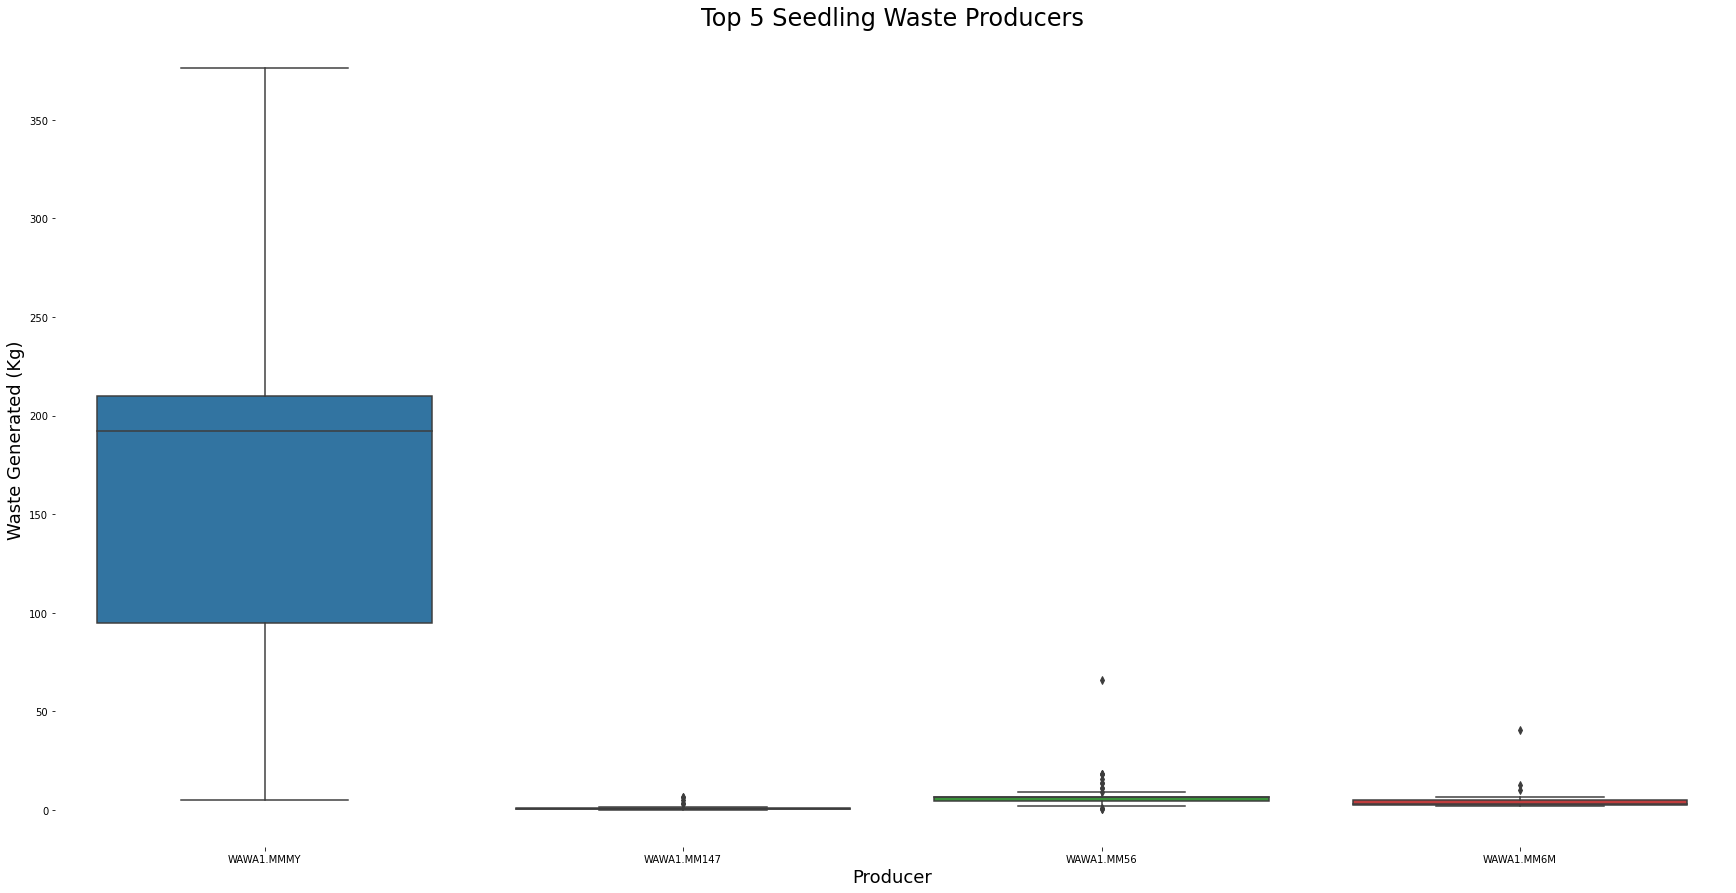

In [136]:
fig, bp = plt.subplots(figsize = (30,15))
bp = sns.boxplot(x = 'mme_id',  y = 'waste_kg', data=wasted_harvested_df[wasted_harvested_df.mme_id.isin(avg_waste_by_producer[:5].mme_id)]);
bp.set_xlabel('Producer', fontsize = 18);
bp.set_ylabel('Waste Generated (Kg)', fontsize = 18);
bp.set_title("Top 5 Seedling Waste Producers", fontsize = 24);
sns.despine(left=True, right=True, top=True, bottom=True)

# Clone Waste
There is no clone waste

In [137]:
batches_df[(batches_df.plant_stage == 'clone') & (batches_df.waste > 0)]

,global_id,created_at,updated_at,mme_id,user_id,external_id,uom,harvested_at,batch_created_at,num_plants,status,strain_id,is_parent_batch,is_child_batch,type,harvest_stage,qty_packaged_flower,qty_packaged_by_product,packaged_completed_at,area_id,origin,plant_stage,deleted_at,flower_dry_weight,waste,other_dry_weight,harvested_end_at,flower_wet_weight,other_wet_weight,waste_kg


# Packaged Product Waste
There is no packaged prodcut waste

In [138]:
batches_df[(batches_df.plant_stage == 'packaged') & (batches_df.waste > 0)]

,global_id,created_at,updated_at,mme_id,user_id,external_id,uom,harvested_at,batch_created_at,num_plants,status,strain_id,is_parent_batch,is_child_batch,type,harvest_stage,qty_packaged_flower,qty_packaged_by_product,packaged_completed_at,area_id,origin,plant_stage,deleted_at,flower_dry_weight,waste,other_dry_weight,harvested_end_at,flower_wet_weight,other_wet_weight,waste_kg


# Transferred Waste
There is no transferred product waste

In [139]:
batches_df[(batches_df.plant_stage == 'transferred') & (batches_df.waste > 0)]

,global_id,created_at,updated_at,mme_id,user_id,external_id,uom,harvested_at,batch_created_at,num_plants,status,strain_id,is_parent_batch,is_child_batch,type,harvest_stage,qty_packaged_flower,qty_packaged_by_product,packaged_completed_at,area_id,origin,plant_stage,deleted_at,flower_dry_weight,waste,other_dry_weight,harvested_end_at,flower_wet_weight,other_wet_weight,waste_kg
